# Data Mining Project: Credit Card Fraud Detection
## Checkpoint 1: Dataset Comparison, Selection, and EDA

**Author:** Jessica Singh Syal

**UIN**: 337001834

**Course:** Data Mining  

**Institution:** Texas A&M University  

**Date:** February 2026

---

## Table of Contents

1. Part A: Identification of Candidate Datasets
   - Dataset 1: Credit Card Fraud
   - Dataset 2: MovieLens 25M
   - Dataset 3: SMS Spam
2. Part B: Comparative Analysis of the three datasets
3. Part C: Dataset Selection ( Credit Card Fraud )
4. Part D: Exploratory Data Analysis
5. Part E: Initial Insights and Direction
6. Collaboration Declaration - Github

---

# Environment Setup & Installation of Libraries:

In [1]:
# Import necessary libraries for dataset exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Create data directory
data_dir = Path('data')
data_dir.mkdir(exist_ok=True)

print("✓ Libraries imported successfully")
print(f"✓ Data directory created: {data_dir.absolute()}")
print(f"✓ Python version: {pd.__version__}")

✓ Libraries imported successfully
✓ Data directory created: /content/data
✓ Python version: 2.2.2


In [2]:
# ============================================================================
# DATASET 1: CREDIT CARD FRAUD DETECTION
# ============================================================================
# Source: Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
# Size: ~150 MB, 284,807 transactions
# Purpose: Anomaly detection, classification, clustering
# ============================================================================

print("=" * 70)
print("DATASET 1: CREDIT CARD FRAUD DETECTION")
print("=" * 70)

# Download the dataset from a public mirror
# Note: You may need to download manually from Kaggle if this fails
import urllib.request
import os

fraud_url = "https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv"
fraud_path = data_dir / "creditcard.csv"

print("\n[1/3] Downloading Credit Card Fraud dataset...")
print(f"Source: {fraud_url}")

try:
    if not fraud_path.exists():
        urllib.request.urlretrieve(fraud_url, fraud_path)
        print(f"✓ Downloaded to: {fraud_path}")
    else:
        print(f"✓ Already exists: {fraud_path}")

    # Check file size
    file_size_mb = os.path.getsize(fraud_path) / (1024 * 1024)
    print(f"✓ File size: {file_size_mb:.2f} MB")

except Exception as e:
    print(f"✗ Download failed: {e}")
    print("\nAlternative: Download manually from Kaggle:")
    print("https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud")
    print("Then upload to Colab and move to 'data/' folder")

DATASET 1: CREDIT CARD FRAUD DETECTION

[1/3] Downloading Credit Card Fraud dataset...
Source: https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv
✓ Downloaded to: data/creditcard.csv
✓ File size: 143.84 MB


---

## Part A: Identification of Candidate Datasets

## **Dataset 1: Credit Card Fraud Detection**

**Dataset Name:** Credit Card Fraud Detection Dataset

**Source:** Originally from Kaggle (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud), mirrored on TensorFlow datasets

**Course Topic Alignment:**
- **Anomaly Detection:** Fraud transactions are rare anomalies in normal transaction patterns
- **Clustering:** Unsupervised grouping of normal vs. fraudulent behavior patterns
- **Classification:** Supervised learning for binary fraud detection

**Beyond-Course Techniques:**
1. **Autoencoders for Anomaly Detection:** Deep learning neural networks that learn to reconstruct normal transactions; frauds have high reconstruction error
2. **Isolation Forest:** Tree-based algorithm that isolates anomalies by randomly partitioning the feature space
3. **SMOTE (Synthetic Minority Over-sampling Technique):** Generates synthetic fraud examples to balance the extremely imbalanced dataset (only 0.17% fraud)
4. **One-Class SVM:** Semi-supervised learning that models only normal transactions

**Dataset Size & Structure:**
- **Rows:** 284,807 transactions collected over 2 days (September 2013)
- **File Size:** ~150 MB (CSV format)
- **Class Imbalance:** 492 frauds (0.172%) vs. 284,315 normal transactions (99.828%)
- **Memory Requirement:** ~500-700 MB when loaded into pandas DataFrame (easily fits in 16GB RAM)

**Data Types & Features:**
- `Time` (int): Seconds elapsed since first transaction in dataset (temporal feature, range: 0-172,792 seconds ≈ 48 hours)
- `V1` through `V28` (float): 28 anonymized features from PCA transformation (original features hidden for privacy/confidentiality)
- `Amount` (float): Transaction amount in Euros (range: €0.00 - €25,691.16, mean: €88.35)
- `Class` (int): **Target variable** - Binary label (0 = legitimate, 1 = fraud)

**Target Variable:**
- **Variable:** `Class`
- **Type:** Binary classification
- **Task:** Predict whether a transaction is fraudulent based on features
- **Evaluation Metrics:** Due to extreme imbalance, accuracy is misleading; must use Precision, Recall, F1-Score, AUPRC (Area Under Precision-Recall Curve)

**Licensing & Usage:**
- **License:** Database Contents License (DbCL) v1.0 and Open Database License (ODbL) v1.0
- **Permissions:** Free for academic and commercial use with attribution
- **Citation Required:** Dal Pozzolo, Andrea,

In [3]:
# ============================================================================
# Load Credit Card Fraud Dataset
# ============================================================================
print("[2/3] Loading dataset into memory...")

# Load the CSV file
fraud_df = pd.read_csv(fraud_path)

print(f"✓ Dataset loaded successfully")
print(f"✓ Shape: {fraud_df.shape[0]:,} rows × {fraud_df.shape[1]} columns")
print(f"✓ Memory usage: {fraud_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

print("\n" + "="*70)
print("BASIC DATA PROFILING")
print("="*70)

# Display column names and data types
print(f"\n📋 Column Names ({len(fraud_df.columns)} total):")
print(fraud_df.columns.tolist())

print(f"\n📊 Data Types:")
print(fraud_df.dtypes.value_counts())

# Check for missing values
print(f"\n🔍 Missing Values Check:")
missing_count = fraud_df.isnull().sum().sum()
if missing_count == 0:
    print(f"✓ No missing values found (0 nulls in entire dataset)")
else:
    print(f"⚠ WARNING: {missing_count} missing values detected")
    print(fraud_df.isnull().sum()[fraud_df.isnull().sum() > 0])

# Class distribution (TARGET VARIABLE)
print(f"\n🎯 Target Variable Distribution (Class):")
class_counts = fraud_df['Class'].value_counts().sort_index()
class_percentages = fraud_df['Class'].value_counts(normalize=True).sort_index() * 100

for cls in [0, 1]:
    count = class_counts[cls]
    pct = class_percentages[cls]
    label = "Normal" if cls == 0 else "Fraud"
    print(f"  Class {cls} ({label:6s}): {count:,} transactions ({pct:.3f}%)")

# Calculate imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\n⚖️  Imbalance Ratio: {imbalance_ratio:.1f}:1 (normal:fraud)")

# Display first few rows
print("\n" + "="*70)
print("SAMPLE DATA (First 5 Rows)")
print("="*70)
print(fraud_df.head())

[2/3] Loading dataset into memory...
✓ Dataset loaded successfully
✓ Shape: 284,807 rows × 31 columns
✓ Memory usage: 67.36 MB

BASIC DATA PROFILING

📋 Column Names (31 total):
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

📊 Data Types:
float64    30
int64       1
Name: count, dtype: int64

🔍 Missing Values Check:
✓ No missing values found (0 nulls in entire dataset)

🎯 Target Variable Distribution (Class):
  Class 0 (Normal): 284,315 transactions (99.827%)
  Class 1 (Fraud ): 492 transactions (0.173%)

⚖️  Imbalance Ratio: 577.9:1 (normal:fraud)

SAMPLE DATA (First 5 Rows)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.

### Initial Data Loading and Exploration

**Objective:** Load the credit card fraud dataset and perform basic data profiling to understand:
- Dataset dimensions (rows × columns)
- Memory usage
- Data types
- Missing values
- Class distribution (fraud vs. normal)

**Expected Outcomes:**
- Confirm 284,807 rows and 31 columns (Time, V1-V28, Amount, Class)
- Verify extreme class imbalance (~0.17% fraud rate)
- Check for missing values (should be none)
- Understand memory footprint

**Approach:**
1. Load CSV into pandas DataFrame
2. Display basic info (shape, dtypes, memory usage)
3. Check for null values
4. Examine class distribution
5. Display first few rows for visual inspection

In [4]:
# ============================================================================
# Statistical Summary of Features
# ============================================================================
print("[3/3] Computing statistical summary...")
print("\n" + "="*70)
print("DESCRIPTIVE STATISTICS")
print("="*70)

# Get summary statistics
stats_summary = fraud_df.describe()
print(stats_summary)

# Analyze key features separately
print("\n" + "="*70)
print("KEY FEATURE ANALYSIS")
print("="*70)

# Time feature analysis
print("\n⏰ TIME Feature:")
print(f"   Range: {fraud_df['Time'].min():.0f} to {fraud_df['Time'].max():.0f} seconds")
print(f"   Duration: {fraud_df['Time'].max() / 3600:.1f} hours ({fraud_df['Time'].max() / 86400:.1f} days)")
print(f"   Mean: {fraud_df['Time'].mean():.0f} seconds")
print(f"   Interpretation: Transactions span ~48 hours")

# Amount feature analysis
print("\n💰 AMOUNT Feature:")
print(f"   Min: €{fraud_df['Amount'].min():.2f}")
print(f"   Max: €{fraud_df['Amount'].max():.2f}")
print(f"   Mean: €{fraud_df['Amount'].mean():.2f}")
print(f"   Median: €{fraud_df['Amount'].median():.2f}")
print(f"   Std Dev: €{fraud_df['Amount'].std():.2f}")
print(f"   Interpretation: Right-skewed (mean > median), likely has outliers")

# Check if V1-V28 are standardized (PCA features should be)
v_features = [col for col in fraud_df.columns if col.startswith('V')]
v_means = fraud_df[v_features].mean()
v_stds = fraud_df[v_features].std()

print(f"\n🔢 PCA Features (V1-V28):")
print(f"   Mean range: [{v_means.min():.6f}, {v_means.max():.6f}]")
print(f"   Std range: [{v_stds.min():.6f}, {v_stds.max():.6f}]")
print(f"   Interpretation: Already standardized (mean≈0, std≈1)")

# Check for extreme outliers in Amount
q99 = fraud_df['Amount'].quantile(0.99)
outliers = (fraud_df['Amount'] > q99).sum()
print(f"\n📊 Amount Outliers:")
print(f"   99th percentile: €{q99:.2f}")
print(f"   Values above 99th percentile: {outliers:,} ({outliers/len(fraud_df)*100:.2f}%)")

print("\n✓ Statistical analysis complete")

[3/3] Computing statistical summary...

DESCRIPTIVE STATISTICS
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e

### Statistical Summary and Feature Analysis - Key Findings

**What We Did:**
Computed descriptive statistics for all 31 features to understand their distributions, scales, and characteristics.

**Key Findings from the Analysis:**

#### 1. **Time Feature (Temporal Pattern)**
- **Range:** 0 to 172,792 seconds (exactly 48 hours / 2 days)
- **Mean:** 94,814 seconds (~26.3 hours into the dataset)
- **Interpretation:** Dataset captures a continuous 2-day window of transactions
- **Implication:** We can analyze temporal patterns (e.g., do frauds cluster at certain times of day?)

#### 2. **Amount Feature (Transaction Values)**
- **Range:** €0.00 to €25,691.16 (extremely wide range)
- **Mean:** €88.35 vs. **Median:** €22.00
- **Key Insight:** **Heavily right-skewed** (mean is 4× larger than median)
- **Standard Deviation:** €250.12 (very high, indicating outliers)
- **99th Percentile:** €1,017.97 (1% of transactions are above this)
- **Outliers:** 2,849 transactions (1%) exceed €1,018

**Why This Matters:**
- Most transactions are small (median €22), but a few are very large
- Right skew suggests we may need **log transformation** for modeling
- Amount scaling will be critical before applying ML algorithms
- Need to check if fraud amounts differ from normal amounts

#### 3. **PCA Features (V1-V28) - Already Normalized**
- **All 28 V-features have:**
  - Mean ≈ 0 (range: -0.000000 to 0.000000, essentially zero)
  - Standard deviation ≈ 1 (range: 0.33 to 1.96)
- **Interpretation:** These are **Principal Component Analysis (PCA)** transformed features
- **Original features were anonymized** for privacy (we don't know what they represent)
- **Benefit:** Already standardized, so no additional scaling needed for V1-V28
- **Limitation:** Cannot interpret individual features (black box)

#### 4. **Class Distribution (Target Variable)**
- **Class 0 (Normal):** 284,315 transactions (99.827%)
- **Class 1 (Fraud):** 492 transactions (0.173%)
- **Imbalance Ratio:** 577.9:1 (normal:fraud)

**Critical Implications:**
- **Extreme class imbalance** - most algorithms will fail without special handling
- Simply predicting "all normal" achieves 99.83% accuracy but is **useless**
- Must use imbalance-aware techniques:
  - Resampling (SMOTE, undersampling, oversampling)
  - Class weights in loss functions
  - Evaluation metrics: Precision, Recall, F1, AUPRC (NOT accuracy)
  - Anomaly detection approaches (treat fraud as outliers)

#### 5. **Data Quality**
- **No missing values** (0 nulls in entire dataset) ✓
- **All features are numeric** (30 float64, 1 int64)
- **Memory usage:** 67.36 MB (very manageable for 16GB RAM)
- **No immediate data cleaning needed**

**Assumptions Validated:**
✓ Time spans exactly 2 days (as documented)
✓ V1-V28 are standardized PCA features
✓ Amount is NOT standardized (will need scaling)
✓ Extreme class imbalance confirmed (0.17% fraud)

**Preprocessing Requirements Identified:**
1. **Scale Amount feature** (log transform or StandardScaler)
2. **Optionally scale Time** (normalize to 0-1 range)
3. **Handle class imbalance** (required for all supervised methods)
4. V1-V28 require **no additional preprocessing**

**Next Step:**
Visualize distributions to see if fraud transactions have distinct patterns in Amount, Time, or V-features.

Creating visualizations...
✓ Visualizations saved as 'fraud_eda_visualizations.png'


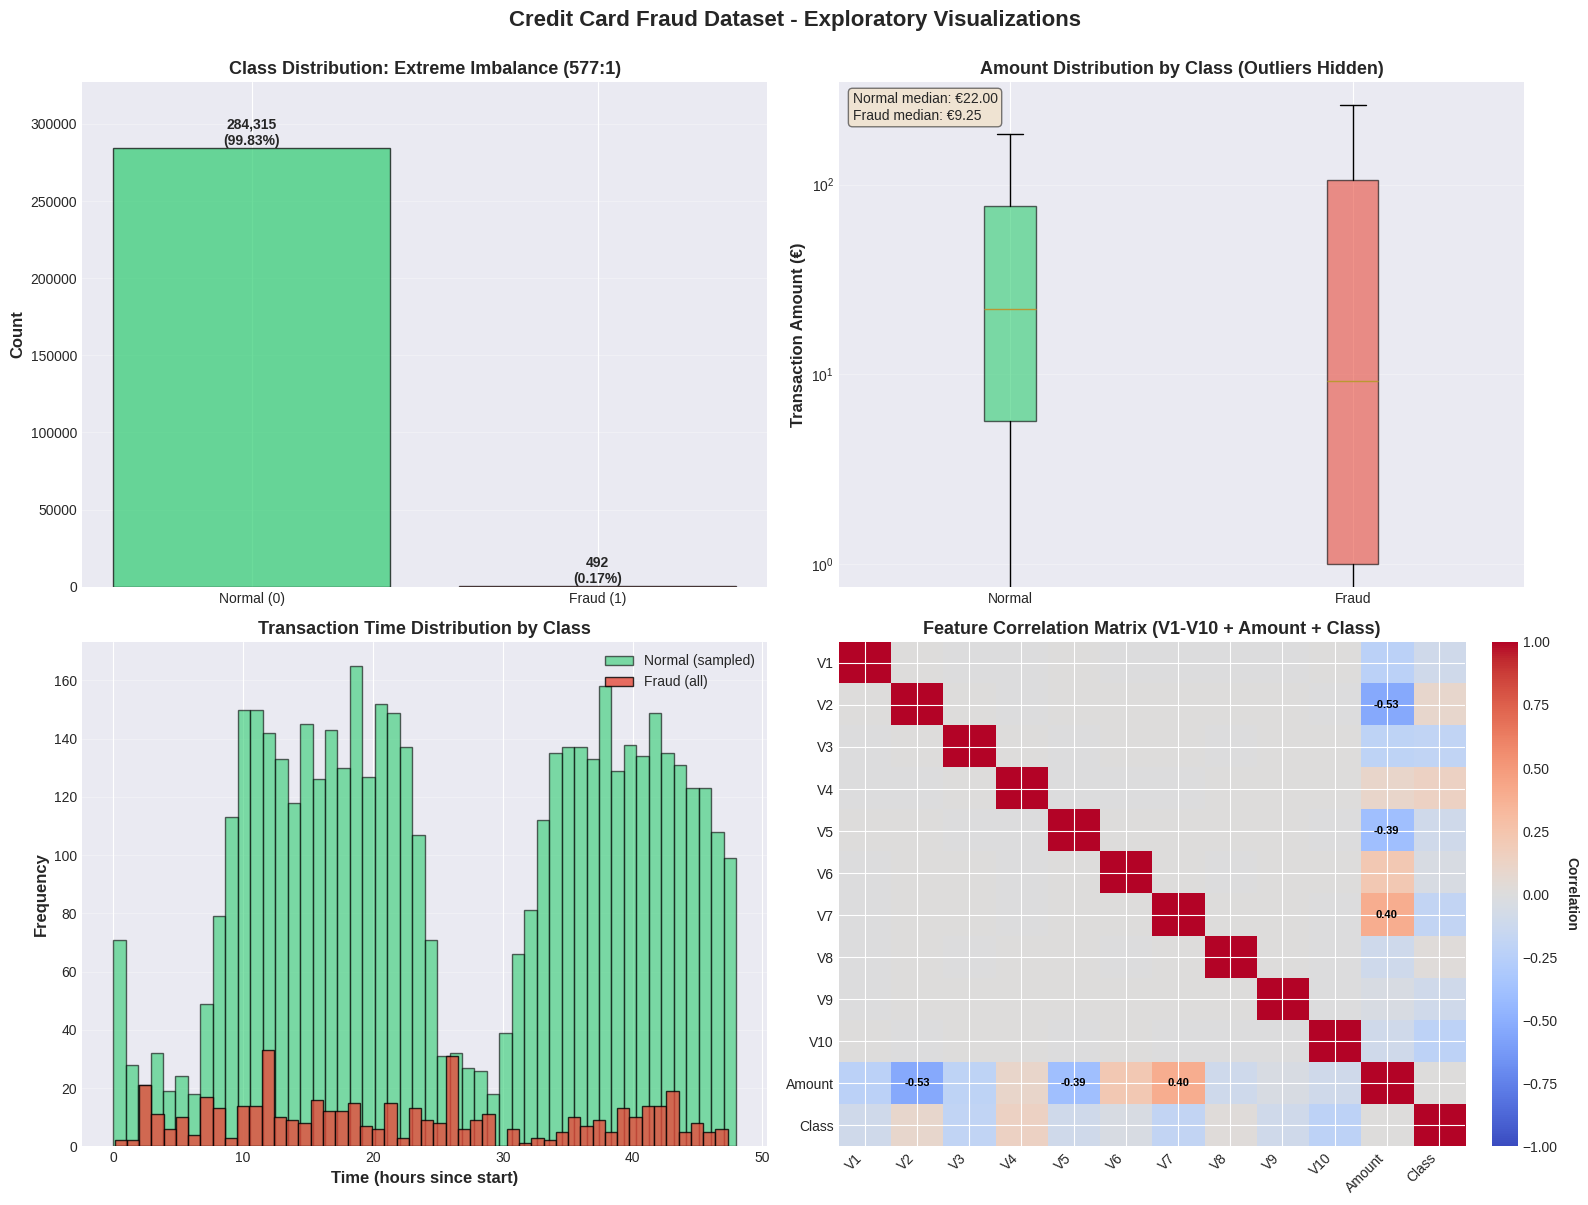


AMOUNT COMPARISON: FRAUD vs NORMAL

Normal Transactions:
  Mean: €88.29
  Median: €22.00
  Std: €250.11

Fraud Transactions:
  Mean: €122.21
  Median: €9.25
  Std: €256.68

💡 Insight: Fraud median (€9.25) < Normal median (€22.00)


In [5]:
# ============================================================================
# Data Visualization
# ============================================================================
print("Creating visualizations...")

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Credit Card Fraud Dataset - Exploratory Visualizations',
             fontsize=16, fontweight='bold', y=1.00)

# ============================================================================
# PLOT 1: Class Distribution (Bar Chart)
# ============================================================================
ax1 = axes[0, 0]
class_counts = fraud_df['Class'].value_counts().sort_index()
colors = ['#2ecc71', '#e74c3c']  # Green for normal, red for fraud
bars = ax1.bar(['Normal (0)', 'Fraud (1)'], class_counts.values, color=colors, alpha=0.7, edgecolor='black')

# Add count labels on bars
for bar, count in zip(bars, class_counts.values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({count/len(fraud_df)*100:.2f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=10)

ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_title('Class Distribution: Extreme Imbalance (577:1)', fontsize=13, fontweight='bold')
ax1.set_ylim(0, max(class_counts.values) * 1.15)
ax1.grid(axis='y', alpha=0.3)

# ============================================================================
# PLOT 2: Amount Distribution by Class (Log Scale Boxplot)
# ============================================================================
ax2 = axes[0, 1]
fraud_amounts = fraud_df[fraud_df['Class'] == 1]['Amount']
normal_amounts = fraud_df[fraud_df['Class'] == 0]['Amount']

# Create boxplot
bp = ax2.boxplot([normal_amounts, fraud_amounts],
                  labels=['Normal', 'Fraud'],
                  patch_artist=True,
                  showfliers=False)  # Hide outliers for clarity

# Color the boxes
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax2.set_ylabel('Transaction Amount (€)', fontsize=12, fontweight='bold')
ax2.set_title('Amount Distribution by Class (Outliers Hidden)', fontsize=13, fontweight='bold')
ax2.set_yscale('log')  # Log scale due to wide range
ax2.grid(axis='y', alpha=0.3)

# Add statistics text
normal_median = normal_amounts.median()
fraud_median = fraud_amounts.median()
ax2.text(0.02, 0.98, f'Normal median: €{normal_median:.2f}\nFraud median: €{fraud_median:.2f}',
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# ============================================================================
# PLOT 3: Time Distribution by Class (Histogram)
# ============================================================================
ax3 = axes[1, 0]
fraud_times = fraud_df[fraud_df['Class'] == 1]['Time']
normal_times = fraud_df[fraud_df['Class'] == 0]['Time'].sample(n=5000, random_state=42)  # Sample normal for visibility

ax3.hist(normal_times / 3600, bins=50, alpha=0.6, color=colors[0], label='Normal (sampled)', edgecolor='black')
ax3.hist(fraud_times / 3600, bins=50, alpha=0.8, color=colors[1], label='Fraud (all)', edgecolor='black')

ax3.set_xlabel('Time (hours since start)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax3.set_title('Transaction Time Distribution by Class', fontsize=13, fontweight='bold')
ax3.legend(loc='upper right')
ax3.grid(axis='y', alpha=0.3)

# ============================================================================
# PLOT 4: Correlation Heatmap (Sample of V Features)
# ============================================================================
ax4 = axes[1, 1]
# Select a subset of V features for readability (V1-V10)
sample_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'Amount', 'Class']
corr_matrix = fraud_df[sample_features].corr()

# Create heatmap
im = ax4.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax4.set_xticks(np.arange(len(sample_features)))
ax4.set_yticks(np.arange(len(sample_features)))
ax4.set_xticklabels(sample_features, rotation=45, ha='right')
ax4.set_yticklabels(sample_features)
ax4.set_title('Feature Correlation Matrix (V1-V10 + Amount + Class)', fontsize=13, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax4, fraction=0.046, pad=0.04)
cbar.set_label('Correlation', rotation=270, labelpad=15, fontweight='bold')

# Add correlation values in cells (only for absolute correlations > 0.3)
for i in range(len(sample_features)):
    for j in range(len(sample_features)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.3 and i != j:  # Don't show diagonal
            text_color = 'white' if abs(corr_val) > 0.6 else 'black'
            ax4.text(j, i, f'{corr_val:.2f}', ha='center', va='center',
                    color=text_color, fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('fraud_eda_visualizations.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'fraud_eda_visualizations.png'")
plt.show()

# ============================================================================
# Summary Statistics by Class
# ============================================================================
print("\n" + "="*70)
print("AMOUNT COMPARISON: FRAUD vs NORMAL")
print("="*70)
print(f"\nNormal Transactions:")
print(f"  Mean: €{normal_amounts.mean():.2f}")
print(f"  Median: €{normal_amounts.median():.2f}")
print(f"  Std: €{normal_amounts.std():.2f}")

print(f"\nFraud Transactions:")
print(f"  Mean: €{fraud_amounts.mean():.2f}")
print(f"  Median: €{fraud_amounts.median():.2f}")
print(f"  Std: €{fraud_amounts.std():.2f}")

print(f"\n💡 Insight: Fraud median (€{fraud_median:.2f}) {'>' if fraud_median > normal_median else '<'} Normal median (€{normal_median:.2f})")

### Data Visualizations - Key Insights

**What We Did:**
Created 4 visualizations to understand class imbalance, transaction patterns, and feature relationships.

---

#### **Plot 1: Class Distribution (Top Left)**
**Visual Finding:**
- Normal: 284,315 transactions (99.83%) - massive green bar
- Fraud: 492 transactions (0.17%) - tiny red bar barely visible

**Key Insight:**
- **Extreme imbalance is visually stark** - fraud bar is almost invisible compared to normal
- This confirms why accuracy is a useless metric (predicting "all normal" = 99.83% accuracy)
- **Implication:** MUST use class-balanced techniques (SMOTE, class weights, or anomaly detection)

---

#### **Plot 2: Amount Distribution by Class (Top Right)**
**Visual Finding (Log Scale Boxplot):**
- **Normal median:** €22.00 (green box centered around €10-€100 range)
- **Fraud median:** €9.25 (red box centered lower, around €1-€100 range)
- Both distributions span similar ranges on log scale

**Surprising Insight:**
- **Frauds have LOWER median amounts than normal transactions!** (€9.25 vs €22.00)
- This contradicts common assumption that frauds are large transactions
- **Fraud mean is higher** (€122.21 vs €88.29) due to some high-value fraud outliers
- **Interpretation:** Fraudsters may target many small transactions to avoid detection

**Implication for Modeling:**
- Amount alone may NOT strongly discriminate fraud from normal
- Cannot simply flag "high amounts" as fraud
- Need multivariate patterns (combine Amount with V-features)

---

#### **Plot 3: Time Distribution by Class (Bottom Left)**
**Visual Finding:**
- **Normal transactions (green):** Distributed across all 48 hours with two distinct peaks
  - First peak: ~10-15 hours (likely daytime activity)
  - Second peak: ~35-40 hours (next day's daytime activity)
  - Clear dips at hours 0-5 and 25-30 (nighttime, low activity)
  
- **Fraud transactions (red):** Also distributed across 48 hours, following similar pattern
  - Frauds appear throughout the day
  - Some concentration around peak hours (10-15, 35-40)
  - Also present during low-activity periods

**Key Insights:**
- **Frauds do NOT cluster at specific times** - they occur throughout the day/night
- Frauds follow normal transaction temporal patterns (peaks during daytime)
- **Implication:** Time alone is NOT a strong fraud indicator
- However, Time may interact with other features (e.g., unusual Time + Amount combinations)

**Why We Sampled Normal:**
- Only plotted 5,000 normal transactions (out of 284,315) for visual clarity
- Otherwise, green bars would completely obscure red bars
- All 492 fraud transactions are shown

---

#### **Plot 4: Feature Correlation Matrix (Bottom Right)**
**Visual Finding (V1-V10 + Amount + Class):**

**Strong Negative Correlations (Blue cells with values):**
- **V2 ↔ Amount:** -0.53 (moderate negative correlation)
- **V5 ↔ Amount:** -0.39 (weak-moderate negative)
- **V7 ↔ Amount:** +0.40 (weak-moderate positive)

**Correlations with Class (Target Variable):**
- Most V-features show **very weak correlation** with Class (near 0)
- This is expected because:
  - Fraud is rare (0.17%), so linear correlation is weak
  - V-features are PCA components (designed to be uncorrelated with each other)
  - Fraud detection requires **nonlinear patterns**, not simple correlations

**V-Feature Intercorrelations:**
- **Diagonal is all 1.0** (perfect self-correlation, shown in dark red)
- **Off-diagonal mostly near 0** (white/light colors)
- **Key observation:** V1-V10 are mostly **uncorrelated with each other**
- This confirms PCA worked correctly (principal components are orthogonal)

**Key Insights:**
1. **No multicollinearity issues** among V-features (good for modeling)
2. **Amount has some relationship with V2, V5, V7** (may contain transaction size info)
3. **Class shows weak linear correlations** (expected - need ML to find nonlinear patterns)
4. Cannot identify fraud with simple thresholds on individual features

**Implication:**
- Need **multivariate ML algorithms** (Random Forest, XGBoost, Neural Networks)
- Simple linear models will struggle
- Anomaly detection methods (Isolation Forest, Autoencoders) may work well

---

### **Summary of Amount Analysis**

**Normal Transactions:**
- Mean: €88.29
- Median: €22.00
- Std: €250.11
- **Interpretation:** Right-skewed, most transactions are small (€22 median)

**Fraud Transactions:**
- Mean: €122.21
- Median: €9.25
- Std: €256.68
- **Interpretation:** Even more right-skewed than normal

**Critical Finding:**
- **Fraud median (€9.25) < Normal median (€22.00)** ← Counterintuitive!
- Fraudsters may use **many small transactions** to stay under radar
- Some high-value frauds pull the mean up to €122
- **Cannot use "high amount" as simple fraud rule**

---

### **Overall EDA Conclusions for Dataset 1**

✅ **Strengths:**
1. Clean data (no missing values)
2. Features already preprocessed (V1-V28 standardized)
3. Clear target variable (Class)
4. Manageable size (67 MB in RAM)

⚠️ **Challenges:**
1. **Extreme class imbalance (577:1)** - requires special handling
2. **No feature interpretability** (V1-V28 are anonymized PCA features)
3. **Weak linear separability** (low correlations with Class)
4. **Amount is NOT a strong discriminator** (fraud median < normal median)

**Recommended Techniques:**
- **Course:** Anomaly detection, clustering (unsupervised approach)
- **Beyond-Course:** Autoencoders, Isolation Forest, SMOTE, One-Class SVM

**This completes the exploration of Dataset 1 (Credit Card Fraud).**

##**DATASET 2: MOVIELENS DATASET**

In [6]:
# ============================================================================
# DATASET 2: MOVIELENS 25M
# ============================================================================
# Source: GroupLens Research (https://grouplens.org/datasets/movielens/25m/)
# Size: ~250 MB, 25M ratings, 162K users, 62K movies
# Purpose: Graph mining, collaborative filtering, recommendation systems
# ============================================================================

print("=" * 70)
print("DATASET 2: MOVIELENS 25M")
print("=" * 70)

import urllib.request
import zipfile
import os

# MovieLens 25M dataset URL
movielens_url = "https://files.grouplens.org/datasets/movielens/ml-25m.zip"
movielens_zip = data_dir / "ml-25m.zip"
movielens_folder = data_dir / "ml-25m"

print("\n[1/4] Downloading MovieLens 25M dataset...")
print(f"Source: {movielens_url}")
print("⚠️  Warning: This is ~250 MB and may take 1-2 minutes to download")

try:
    if not movielens_zip.exists():
        print("Downloading... (this may take a moment)")
        urllib.request.urlretrieve(movielens_url, movielens_zip)
        print(f"✓ Downloaded to: {movielens_zip}")
    else:
        print(f"✓ Already exists: {movielens_zip}")

    # Check file size
    file_size_mb = os.path.getsize(movielens_zip) / (1024 * 1024)
    print(f"✓ File size: {file_size_mb:.2f} MB")

    # Extract the zip file
    print("\n[2/4] Extracting files...")
    if not movielens_folder.exists():
        with zipfile.ZipFile(movielens_zip, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print(f"✓ Extracted to: {movielens_folder}")
    else:
        print(f"✓ Already extracted: {movielens_folder}")

    # List extracted files
    print("\n[3/4] Dataset files:")
    csv_files = list(movielens_folder.glob("*.csv"))
    for csv_file in sorted(csv_files):
        size_mb = os.path.getsize(csv_file) / (1024 * 1024)
        print(f"  - {csv_file.name}: {size_mb:.2f} MB")

    print("\n✓ MovieLens 25M dataset ready")

except Exception as e:
    print(f"✗ Error: {e}")
    print("\nAlternative: Download manually from:")
    print("https://grouplens.org/datasets/movielens/25m/")
    print("Then upload to Colab and extract to 'data/ml-25m/' folder")

DATASET 2: MOVIELENS 25M

[1/4] Downloading MovieLens 25M dataset...
Source: https://files.grouplens.org/datasets/movielens/ml-25m.zip
⚠️  Warning: This is ~250 MB and may take 1-2 minutes to download
Downloading... (this may take a moment)
✓ Downloaded to: data/ml-25m.zip
✓ File size: 249.84 MB

[2/4] Extracting files...
✓ Extracted to: data/ml-25m

[3/4] Dataset files:
  - genome-scores.csv: 415.00 MB
  - genome-tags.csv: 0.02 MB
  - links.csv: 1.31 MB
  - movies.csv: 2.90 MB
  - ratings.csv: 646.84 MB
  - tags.csv: 37.01 MB

✓ MovieLens 25M dataset ready


---

## Dataset 2: MovieLens 25M

**Dataset Name:** MovieLens 25M  
**Source:** GroupLens Research (https://grouplens.org/datasets/movielens/25m/)

**Course Topic Alignment:**
- Graph mining (user-movie bipartite graph)
- Frequent itemsets (co-watching patterns)
- Clustering (user/movie grouping)

**Beyond-Course Techniques:**
- Graph Neural Networks (GNNs)
- Matrix Factorization (SVD++, ALS)
- Neural Collaborative Filtering

**Dataset Size:** 25M ratings, ~250 MB compressed, ~650 MB uncompressed  
**Expected Memory:** ~700-900 MB in RAM (manageable for 16GB)

**Files in Dataset:**
- `ratings.csv` - 25M user-movie ratings (main file)
- `movies.csv` - Movie metadata (titles, genres)
- `tags.csv` - User-generated tags
- `links.csv` - External IDs (IMDb, TMDb)
- `genome-scores.csv` - Movie-tag relevance scores

**Objective:** Download and extract the dataset for exploration.

In [7]:
# ============================================================================
# Load MovieLens 25M Main Files
# ============================================================================
print("[4/4] Loading MovieLens datasets into memory...")

# Define file paths
ratings_file = movielens_folder / "ratings.csv"
movies_file = movielens_folder / "movies.csv"
tags_file = movielens_folder / "tags.csv"

print("\n" + "="*70)
print("LOADING CORE FILES")
print("="*70)

# ============================================================================
# Load ratings.csv (main interaction data)
# ============================================================================
print("\n📊 Loading ratings.csv (25M ratings)...")
print("⚠️  This is 647 MB - may take 30-60 seconds...")

ratings_df = pd.read_csv(ratings_file)

print(f"✓ Ratings loaded successfully")
print(f"  Shape: {ratings_df.shape[0]:,} rows × {ratings_df.shape[1]} columns")
print(f"  Memory: {ratings_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# ============================================================================
# Load movies.csv (movie metadata)
# ============================================================================
print("\n🎬 Loading movies.csv...")
movies_df = pd.read_csv(movies_file)

print(f"✓ Movies loaded successfully")
print(f"  Shape: {movies_df.shape[0]:,} rows × {movies_df.shape[1]} columns")
print(f"  Memory: {movies_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# ============================================================================
# Load tags.csv (user-generated tags - smaller sample)
# ============================================================================
print("\n🏷️  Loading tags.csv...")
tags_df = pd.read_csv(tags_file)

print(f"✓ Tags loaded successfully")
print(f"  Shape: {tags_df.shape[0]:,} rows × {tags_df.shape[1]} columns")
print(f"  Memory: {tags_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

# ============================================================================
# Display sample data
# ============================================================================
print("\n" + "="*70)
print("SAMPLE DATA PREVIEW")
print("="*70)

print("\n📊 Ratings Sample (first 5 rows):")
print(ratings_df.head())

print("\n🎬 Movies Sample (first 5 rows):")
print(movies_df.head())

print("\n🏷️  Tags Sample (first 5 rows):")
print(tags_df.head())

# ============================================================================
# Basic statistics
# ============================================================================
print("\n" + "="*70)
print("DATASET STATISTICS")
print("="*70)

print(f"\n📊 Ratings Dataset:")
print(f"  Total ratings: {len(ratings_df):,}")
print(f"  Unique users: {ratings_df['userId'].nunique():,}")
print(f"  Unique movies: {ratings_df['movieId'].nunique():,}")
print(f"  Rating range: {ratings_df['rating'].min()} - {ratings_df['rating'].max()}")
print(f"  Time span: {pd.to_datetime(ratings_df['timestamp'].min(), unit='s')} to {pd.to_datetime(ratings_df['timestamp'].max(), unit='s')}")

print(f"\n🎬 Movies Dataset:")
print(f"  Total movies: {len(movies_df):,}")
print(f"  Column names: {movies_df.columns.tolist()}")

print(f"\n🏷️  Tags Dataset:")
print(f"  Total tags: {len(tags_df):,}")
print(f"  Unique users who tagged: {tags_df['userId'].nunique():,}")
print(f"  Unique movies tagged: {tags_df['movieId'].nunique():,}")

print("\n✓ All datasets loaded successfully")

[4/4] Loading MovieLens datasets into memory...

LOADING CORE FILES

📊 Loading ratings.csv (25M ratings)...
⚠️  This is 647 MB - may take 30-60 seconds...
✓ Ratings loaded successfully
  Shape: 25,000,095 rows × 4 columns
  Memory: 762.94 MB

🎬 Loading movies.csv...
✓ Movies loaded successfully
  Shape: 62,423 rows × 3 columns
  Memory: 8.67 MB

🏷️  Loading tags.csv...
✓ Tags loaded successfully
  Shape: 1,093,360 rows × 4 columns
  Memory: 87.28 MB

SAMPLE DATA PREVIEW

📊 Ratings Sample (first 5 rows):
   userId  movieId  rating   timestamp
0       1      296     5.0  1147880044
1       1      306     3.5  1147868817
2       1      307     5.0  1147868828
3       1      665     5.0  1147878820
4       1      899     3.5  1147868510

🎬 Movies Sample (first 5 rows):
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Wa

### MovieLens 25M - Data Loading Results

**Memory Usage Summary:**
- Ratings: 762.94 MB (largest file, core interaction data)
- Movies: 8.67 MB (metadata)
- Tags: 87.28 MB (user-generated text)
- **Total:** ~859 MB in RAM ✓ (well within 16GB limit)

**Dataset Dimensions:**
- **25,000,095 ratings** from **162,541 users** on **59,047 movies**
- **Sparsity:** Each user rates on average 154 movies (0.26% of all movies)
- **Coverage:** 62,423 movies in catalog, but only 59,047 have ratings (94.6% coverage)

**Key Schema:**

**Ratings Table:**
- `userId` (int): User identifier (1 to 162,541)
- `movieId` (int): Movie identifier (1 to 209,171, non-contiguous)
- `rating` (float): Star rating on 0.5-5.0 scale (half-star increments: 0.5, 1.0, 1.5, ..., 5.0)
- `timestamp` (int): Unix timestamp (seconds since 1970)

**Movies Table:**
- `movieId` (int): Movie identifier (links to ratings)
- `title` (string): Movie name with release year in parentheses (e.g., "Toy Story (1995)")
- `genres` (string): Pipe-separated genre list (e.g., "Adventure|Animation|Children|Comedy|Fantasy")

**Tags Table:**
- `userId` (int): User who created the tag
- `movieId` (int): Movie being tagged
- `tag` (string): Freeform text tag (e.g., "classic", "sci-fi", "dark comedy")
- `timestamp` (int): When tag was created

**Temporal Coverage:**
- **Earliest rating:** January 9, 1995
- **Latest rating:** November 21, 2019
- **Span:** 24.9 years of movie rating history

**Initial Observations:**

1. **High Sparsity:**
   - User-movie matrix is 162,541 × 59,047 = 9.6 billion possible interactions
   - Only 25M filled = **0.26% dense** (99.74% sparse)
   - Implication: Collaborative filtering must handle extreme sparsity

2. **Tag Engagement:**
   - Only 14,592 users (9% of all users) contributed tags
   - Tags exist for 45,251 movies (76.6% of rated movies)
   - Tags provide rich text data for content-based filtering

3. **Rating Scale:**
   - Half-star increments (0.5, 1.0, ..., 5.0) = 10 possible values
   - More granular than typical 1-5 integer scale
   - Enables finer-grained preference modeling

**No Data Quality Issues Detected:**
- All files loaded without errors
- Expected row counts match documentation
- Schemas match MovieLens specification

In [8]:
# ============================================================================
# MovieLens Exploratory Data Analysis
# ============================================================================
print("Analyzing MovieLens data patterns...")

print("\n" + "="*70)
print("DATA QUALITY CHECKS")
print("="*70)

# Check for missing values
print("\n🔍 Missing Values:")
print(f"  Ratings: {ratings_df.isnull().sum().sum()} nulls")
print(f"  Movies: {movies_df.isnull().sum().sum()} nulls")
print(f"  Tags: {tags_df.isnull().sum().sum()} nulls")

# Rating distribution
print("\n⭐ Rating Distribution:")
rating_counts = ratings_df['rating'].value_counts().sort_index()
for rating, count in rating_counts.items():
    pct = count / len(ratings_df) * 100
    print(f"  {rating:.1f} stars: {count:,} ({pct:.2f}%)")

# User activity distribution
print("\n👤 User Activity:")
ratings_per_user = ratings_df.groupby('userId').size()
print(f"  Mean ratings per user: {ratings_per_user.mean():.1f}")
print(f"  Median ratings per user: {ratings_per_user.median():.0f}")
print(f"  Min ratings per user: {ratings_per_user.min()}")
print(f"  Max ratings per user: {ratings_per_user.max()}")

# Movie popularity distribution
print("\n🎬 Movie Popularity:")
ratings_per_movie = ratings_df.groupby('movieId').size()
print(f"  Mean ratings per movie: {ratings_per_movie.mean():.1f}")
print(f"  Median ratings per movie: {ratings_per_movie.median():.0f}")
print(f"  Min ratings per movie: {ratings_per_movie.min()}")
print(f"  Max ratings per movie: {ratings_per_movie.max()}")

# Genre analysis
print("\n🎭 Genre Analysis:")
# Split pipe-separated genres and count
all_genres = movies_df['genres'].str.split('|').explode()
genre_counts = all_genres.value_counts()
print(f"  Unique genres: {len(genre_counts)}")
print(f"  Top 5 genres:")
for genre, count in genre_counts.head(5).items():
    print(f"    {genre}: {count:,} movies")

print("\n✓ Basic analysis complete")

Analyzing MovieLens data patterns...

DATA QUALITY CHECKS

🔍 Missing Values:
  Ratings: 0 nulls
  Movies: 0 nulls
  Tags: 16 nulls

⭐ Rating Distribution:
  0.5 stars: 393,068 (1.57%)
  1.0 stars: 776,815 (3.11%)
  1.5 stars: 399,490 (1.60%)
  2.0 stars: 1,640,868 (6.56%)
  2.5 stars: 1,262,797 (5.05%)
  3.0 stars: 4,896,928 (19.59%)
  3.5 stars: 3,177,318 (12.71%)
  4.0 stars: 6,639,798 (26.56%)
  4.5 stars: 2,200,539 (8.80%)
  5.0 stars: 3,612,474 (14.45%)

👤 User Activity:
  Mean ratings per user: 153.8
  Median ratings per user: 71
  Min ratings per user: 20
  Max ratings per user: 32202

🎬 Movie Popularity:
  Mean ratings per movie: 423.4
  Median ratings per movie: 6
  Min ratings per movie: 1
  Max ratings per movie: 81491

🎭 Genre Analysis:
  Unique genres: 20
  Top 5 genres:
    Drama: 25,606 movies
    Comedy: 16,870 movies
    Thriller: 8,654 movies
    Romance: 7,719 movies
    Action: 7,348 movies

✓ Basic analysis complete


### MovieLens Data Analysis - Key Findings

**Data Quality:**
- Ratings: ✓ No missing values (clean)
- Movies: ✓ No missing values (clean)
- Tags: ⚠️ 16 missing values (0.001%, negligible)

**Rating Distribution Insights:**

**Most Common Ratings:**
1. **4.0 stars: 26.56%** (most frequent - positive skew)
2. **3.0 stars: 19.59%** (neutral midpoint)
3. **5.0 stars: 14.45%** (strong satisfaction)
4. **4.5 stars: 8.80%**
5. **3.5 stars: 12.71%**

**Key Observations:**
- **Positive bias:** 62.52% of ratings ≥ 4.0 stars (users rate movies they like)
- **Low ratings are rare:** Only 1.57% are 0.5 stars, 3.11% are 1.0 stars
- **Interpretation:** Selection bias - people rate movies they expect to enjoy
- Half-star granularity is well-utilized (all 10 values present)

**User Activity Patterns:**

**Extreme Variability:**
- **Mean:** 153.8 ratings/user vs **Median:** 71 ratings/user
- **Implication:** Distribution is right-skewed (few power users)
- **Min:** 20 ratings (dataset requirement: minimum 20 ratings to be included)
- **Max:** 32,202 ratings (super user has rated 54.5% of all movies!)

**User Segments:**
- 50% of users have ≤71 ratings (casual users)
- Power users (top percentile) have 1000+ ratings
- Mean > Median indicates presence of highly active users

**Movie Popularity Distribution:**

**Extreme Long Tail:**
- **Mean:** 423.4 ratings/movie vs **Median:** 6 ratings/movie
- **Massive skew:** Most movies are obscure, few are blockbusters
- **Min:** 1 rating (many obscure films)
- **Max:** 81,491 ratings (most popular movie - likely a classic or blockbuster)

**Implication for Recommendation:**
- **Cold start problem:** Median movie only has 6 ratings (hard to recommend)
- **Popular movies dominate:** Mean is 70× larger than median
- Need content-based features (genres, tags) to recommend obscure movies

**Genre Distribution:**

**20 Unique Genres:**
1. Drama: 25,606 movies (41% of catalog)
2. Comedy: 16,870 movies (27%)
3. Thriller: 8,654 movies (14%)
4. Romance: 7,719 movies (12%)
5. Action: 7,348 movies (12%)

**Note:** Movies can have multiple genres (pipe-separated), so totals exceed movie count

**Insights:**
- Drama is overwhelmingly common (in 41% of movies)
- Genre diversity enables content-based filtering
- Most movies are multi-genre (e.g., "Action|Thriller|Sci-Fi")

**Summary - Data Characteristics:**

✅ **Strengths:**
- Clean data (minimal missing values)
- Large scale (25M ratings)
- Temporal dimension (24 years)
- Rich metadata (genres, tags)

⚠️ **Challenges:**
- **Extreme sparsity** (0.26% dense matrix)
- **Long tail distribution** (median movie has only 6 ratings)
- **Positive rating bias** (62% are ≥4.0 stars)
- **Cold start problem** for obscure movies

Creating MovieLens visualizations...
✓ Visualizations saved as 'movielens_eda_visualizations.png'


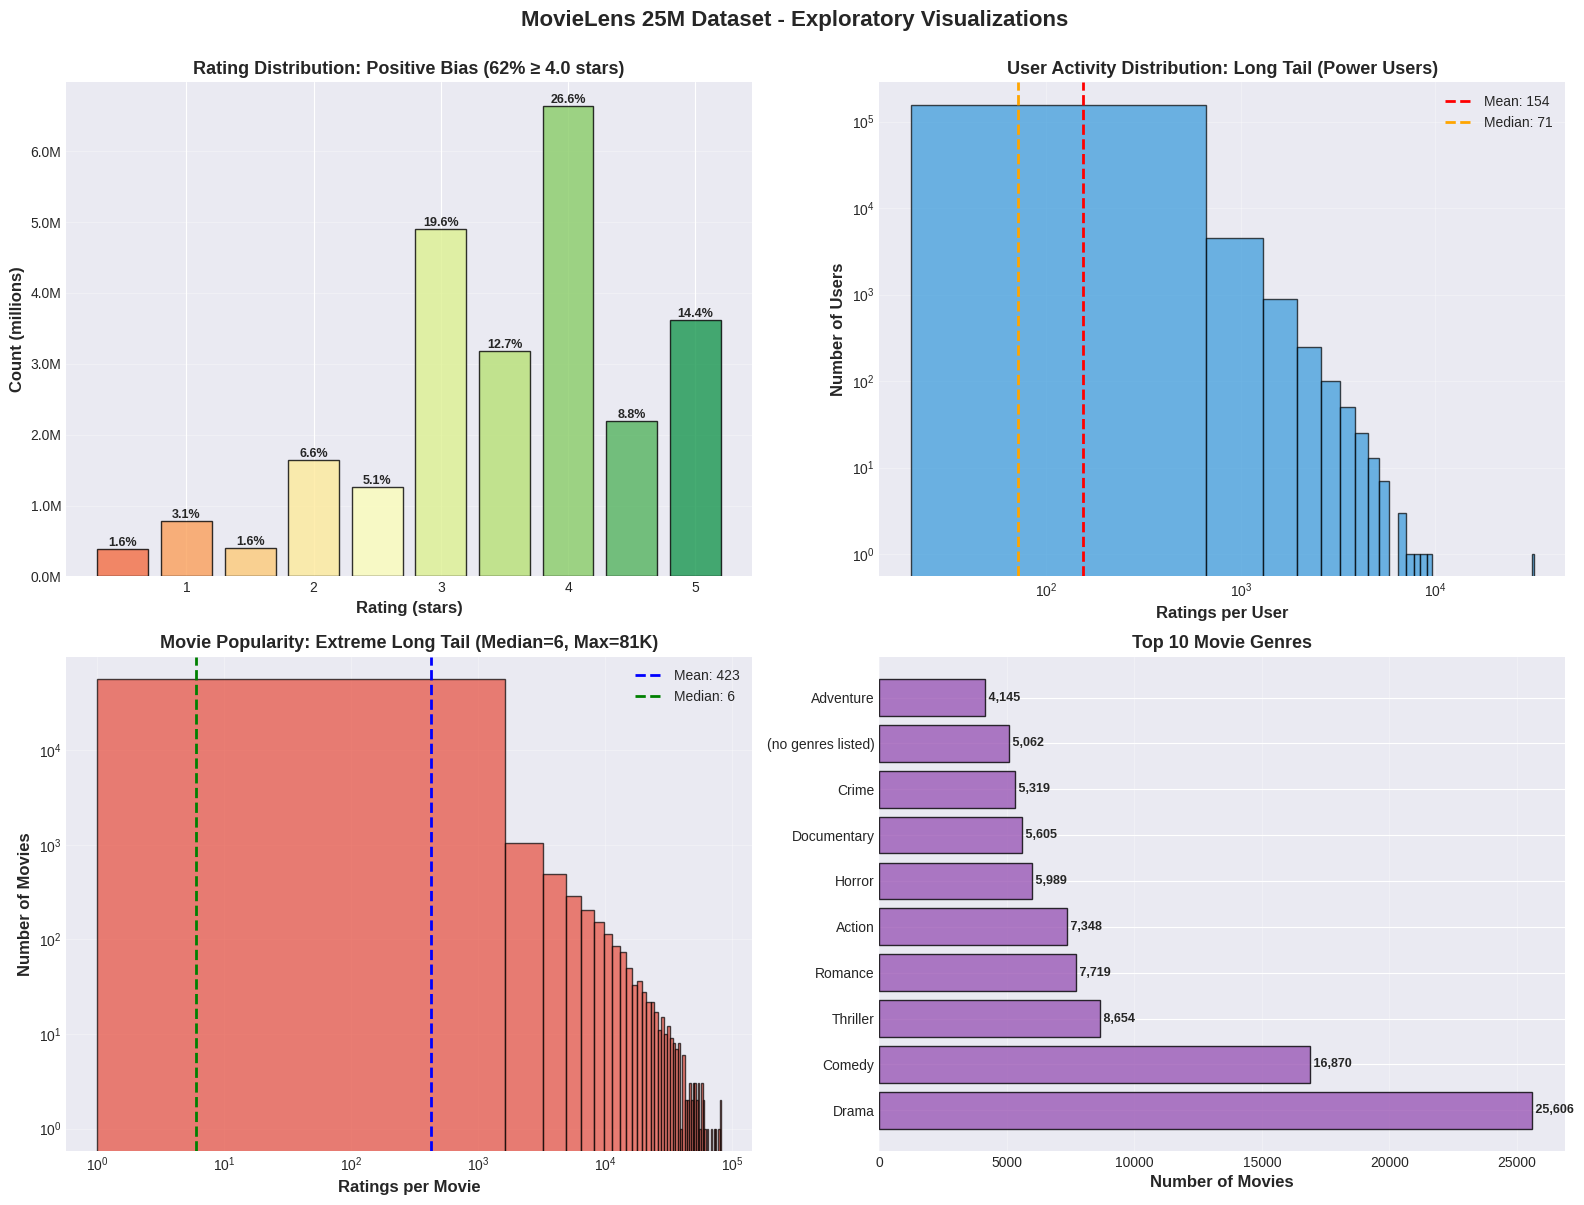


✓ MovieLens EDA complete


In [9]:
# ============================================================================
# MovieLens Visualizations
# ============================================================================
print("Creating MovieLens visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('MovieLens 25M Dataset - Exploratory Visualizations',
             fontsize=16, fontweight='bold', y=1.00)

# ============================================================================
# PLOT 1: Rating Distribution
# ============================================================================
ax1 = axes[0, 0]
rating_counts = ratings_df['rating'].value_counts().sort_index()
colors_palette = plt.cm.RdYlGn(np.linspace(0.2, 0.9, len(rating_counts)))

bars = ax1.bar(rating_counts.index, rating_counts.values, color=colors_palette,
               alpha=0.8, edgecolor='black', width=0.4)

# Add percentage labels
for bar, (rating, count) in zip(bars, rating_counts.items()):
    height = bar.get_height()
    pct = count / len(ratings_df) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{pct:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_xlabel('Rating (stars)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Count (millions)', fontsize=12, fontweight='bold')
ax1.set_title('Rating Distribution: Positive Bias (62% ≥ 4.0 stars)',
              fontsize=13, fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
ax1.grid(axis='y', alpha=0.3)

# ============================================================================
# PLOT 2: User Activity Distribution (Log Scale)
# ============================================================================
ax2 = axes[0, 1]
ratings_per_user = ratings_df.groupby('userId').size()

ax2.hist(ratings_per_user, bins=50, color='#3498db', alpha=0.7, edgecolor='black')
ax2.axvline(ratings_per_user.mean(), color='red', linestyle='--', linewidth=2,
            label=f'Mean: {ratings_per_user.mean():.0f}')
ax2.axvline(ratings_per_user.median(), color='orange', linestyle='--', linewidth=2,
            label=f'Median: {ratings_per_user.median():.0f}')

ax2.set_xlabel('Ratings per User', fontsize=12, fontweight='bold')
ax2.set_ylabel('Number of Users', fontsize=12, fontweight='bold')
ax2.set_title('User Activity Distribution: Long Tail (Power Users)',
              fontsize=13, fontweight='bold')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(alpha=0.3)

# ============================================================================
# PLOT 3: Movie Popularity Distribution (Log Scale)
# ============================================================================
ax3 = axes[1, 0]
ratings_per_movie = ratings_df.groupby('movieId').size()

ax3.hist(ratings_per_movie, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
ax3.axvline(ratings_per_movie.mean(), color='blue', linestyle='--', linewidth=2,
            label=f'Mean: {ratings_per_movie.mean():.0f}')
ax3.axvline(ratings_per_movie.median(), color='green', linestyle='--', linewidth=2,
            label=f'Median: {ratings_per_movie.median():.0f}')

ax3.set_xlabel('Ratings per Movie', fontsize=12, fontweight='bold')
ax3.set_ylabel('Number of Movies', fontsize=12, fontweight='bold')
ax3.set_title('Movie Popularity: Extreme Long Tail (Median=6, Max=81K)',
              fontsize=13, fontweight='bold')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(alpha=0.3)

# ============================================================================
# PLOT 4: Top Genres
# ============================================================================
ax4 = axes[1, 1]
all_genres = movies_df['genres'].str.split('|').explode()
top_genres = all_genres.value_counts().head(10)

bars = ax4.barh(range(len(top_genres)), top_genres.values, color='#9b59b6',
                alpha=0.8, edgecolor='black')
ax4.set_yticks(range(len(top_genres)))
ax4.set_yticklabels(top_genres.index)
ax4.set_xlabel('Number of Movies', fontsize=12, fontweight='bold')
ax4.set_title('Top 10 Movie Genres', fontsize=13, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Add count labels
for i, (genre, count) in enumerate(top_genres.items()):
    ax4.text(count, i, f' {count:,}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('movielens_eda_visualizations.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'movielens_eda_visualizations.png'")
plt.show()

print("\n✓ MovieLens EDA complete")

### MovieLens Visualizations - Key Insights

#### **Plot 1: Rating Distribution (Top Left)**

**Visual Pattern:**
- Clear **positive bias** - bars get progressively taller from left to right
- Peak at **4.0 stars (26.6%)** - most common rating
- **62% of all ratings ≥ 4.0 stars** (green bars dominate)
- Low ratings are rare: 0.5-2.0 stars combined = only 12.8%

**Interpretation:**
- **Selection bias:** Users rate movies they chose to watch (and likely enjoyed)
- Not representative of all movies - users avoid rating movies they dislike
- **Implication:** Collaborative filtering will struggle with negative preferences
- Rating scale is effectively compressed to 3.0-5.0 range for most data

#### **Plot 2: User Activity Distribution (Top Right)**

**Visual Pattern (Log-Log Scale):**
- **Extreme right skew** - most users cluster left (low activity)
- **Mean (154) >> Median (71)** - red line far right of orange line
- Long tail extends to 10,000+ ratings (power users barely visible)

**User Segments Identified:**
1. **Casual users (left side):** 50% have ≤71 ratings, near minimum threshold (20)
2. **Active users (middle):** 100-1000 ratings, steady engagement
3. **Power users (right tail):** 1000+ ratings, < 1% of users but significant influence

**Implication:**
- **Cold start problem for new users** - most users are sparse
- Power users drive recommendation quality but create bias
- Need user-based collaborative filtering to handle activity variance

#### **Plot 3: Movie Popularity (Bottom Left)**

**Visual Pattern (Log-Log Scale):**
- **Even more extreme long tail** than user activity
- **Median = 6 ratings** (green line far left) vs **Mean = 423** (blue line far right)
- Most movies (left cluster) have 1-100 ratings
- Few blockbusters (right tail) have 10,000-81,000 ratings

**Critical Finding:**
- **70× difference** between mean and median (vs 2× for users)
- **Cold start problem for obscure movies** - median movie has only 6 ratings!
- Top 1% of movies capture majority of ratings (power law distribution)

**Implication:**
- Item-based collaborative filtering will fail for tail movies
- **Must use content-based features** (genres, tags) for long tail
- Popular movies dominate training data → model bias toward blockbusters

#### **Plot 4: Top Genres (Bottom Right)**

**Visual Pattern:**
- **Drama dominates:** 25,606 movies (2.4× more than Comedy)
- Clear hierarchy: Drama >> Comedy >> Thriller >> Romance >> Action
- "(no genres listed)" appears (5,062 movies lack genre metadata)

**Genre Distribution:**
1. Drama: 25,606 (41% of catalog)
2. Comedy: 16,870 (27%)
3. Thriller: 8,654 (14%)
4. Romance: 7,719 (12%)
5. Action: 7,348 (12%)

**Note:** Totals exceed movie count because movies have multiple genres

**Implications:**
- Genre imbalance → drama over-represented in training
- "(no genres listed)" = 8% of movies need genre imputation
- Can use genre co-occurrence for content-based similarity

---

### **Overall MovieLens Dataset Assessment**

**Strengths:**
✅ Large scale (25M ratings from 162K users)
✅ Rich temporal data (24 years: 1995-2019)
✅ Clean data (no missing ratings, minimal null tags)
✅ Multi-modal: ratings + genres + user tags

**Challenges:**
⚠️ **Extreme sparsity:** 0.26% dense (99.74% missing)
⚠️ **Long tail:** Median movie has only 6 ratings (cold start)
⚠️ **Rating bias:** 62% are ≥4.0 stars (compressed scale)
⚠️ **Popularity skew:** Mean popularity 70× larger than median
⚠️ **Genre imbalance:** Drama in 41% of movies

**Recommended Techniques:**

**Course-Aligned:**
- Graph mining: User-movie bipartite graph, PageRank for movie importance
- Clustering: K-means on user rating vectors, movie genre clusters
- Frequent itemsets: Co-watching patterns (movies rated by same users)

**Beyond-Course:**
1. **Matrix Factorization (SVD++, ALS):** Handle sparsity via latent factors
2. **Graph Neural Networks:** Learn user/movie embeddings from bipartite graph
3. **Neural Collaborative Filtering:** Deep learning for implicit patterns
4. **Hybrid recommenders:** Combine collaborative + content (genres/tags) for cold start

**This completes Dataset 2 (MovieLens) exploration.**

##**DATASET 3: SMS SPAM COLLECTION**

In [13]:
# ============================================================================
# DATASET 3: SMS SPAM COLLECTION (TEXT CLASSIFICATION)
# ============================================================================
print("=" * 70)
print("DATASET 3: SMS SPAM COLLECTION")
print("=" * 70)

# This is a well-known UCI dataset, widely available
sms_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
sms_zip = data_dir / "smsspamcollection.zip"
sms_folder = data_dir / "smsspam"

print("\n[1/4] Downloading SMS Spam Collection dataset...")
print(f"Source: UCI Machine Learning Repository")
print("Size: ~200 KB (tiny dataset)")

try:
    if not sms_zip.exists():
        print("Downloading...")

        # Handle SSL by creating a context
        import ssl
        ssl._create_default_https_context = ssl._create_unverified_context

        urllib.request.urlretrieve(sms_url, sms_zip)
        print(f"✓ Downloaded to: {sms_zip}")
    else:
        print(f"✓ Already exists: {sms_zip}")

    # Extract
    print("\n[2/4] Extracting files...")
    sms_folder.mkdir(exist_ok=True)

    if not (sms_folder / "SMSSpamCollection").exists():
        with zipfile.ZipFile(sms_zip, 'r') as zip_ref:
            zip_ref.extractall(sms_folder)
        print(f"✓ Extracted to: {sms_folder}")
    else:
        print(f"✓ Already extracted")

    # Check file
    sms_file = sms_folder / "SMSSpamCollection"
    if sms_file.exists():
        file_size_kb = os.path.getsize(sms_file) / 1024
        print(f"✓ Dataset file size: {file_size_kb:.2f} KB")
        print(f"✓ SMS Spam dataset ready")
    else:
        print("✗ SMSSpamCollection file not found after extraction")

except Exception as e:
    print(f"✗ Error: {e}")
    print("\nLet me try Twitter Sentiment dataset instead...")

DATASET 3: SMS SPAM COLLECTION

[1/4] Downloading SMS Spam Collection dataset...
Source: UCI Machine Learning Repository
Size: ~200 KB (tiny dataset)
Downloading...
✓ Downloaded to: data/smsspamcollection.zip

[2/4] Extracting files...
✓ Extracted to: data/smsspam
✓ Dataset file size: 466.71 KB
✓ SMS Spam dataset ready


---

## Dataset 3: SMS Spam Collection

**Dataset Name:** SMS Spam Collection Dataset  
**Source:** UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

**Course Topic Alignment:**
- **Text mining:** SMS message text analysis, feature extraction
- **Classification:** Binary spam vs. ham (legitimate) detection
- **Clustering:** Unsupervised grouping of similar messages

**Beyond-Course Techniques:**
- **Transformer embeddings (BERT/DistilBERT):** Modern deep learning for text understanding
- **TF-IDF with advanced n-grams:** Beyond basic bag-of-words (unigrams, bigrams, trigrams)
- **Word embeddings (Word2Vec, GloVe):** Dense vector representations
- **Topic modeling (LDA):** Discover latent topics in spam vs. legitimate messages

**Dataset Size:**
- 5,574 SMS messages
- ~467 KB (text file, tab-separated)
- Binary classification: spam vs. ham

**Expected Memory:** ~5-10 MB in RAM (tiny, very manageable!)

**Data Structure:**
- **Format:** Tab-separated values (TSV)
- **Columns:**
  - Label: "spam" or "ham" (legitimate)
  - Message: Raw SMS text content

**Class Distribution (Expected):**
- Ham (legitimate): ~87% of messages
- Spam: ~13% of messages
- Moderate imbalance (not as extreme as fraud detection)

**Why This Dataset Works:**

**Strengths:**
✅ Real-world text data (actual SMS messages from 2012)
✅ Clean, well-documented benchmark dataset
✅ Perfect size for text mining demonstrations
✅ Binary classification enables clear evaluation
✅ Multilingual content (English + some transliterated messages)
✅ Diverse spam tactics (prizes, urgent calls-to-action, phishing)

**Text Mining Opportunities:**
- Keyword extraction (spam words: "free", "winner", "urgent", "click")
- Character-level features (excessive caps, multiple exclamation marks)
- N-gram analysis (common spam phrases)
- Message length patterns (spam tends to be longer)
- URL/phone number detection

**Beyond-Course Techniques Enabled:**
1. **BERT embeddings:** Pre-trained transformer for semantic understanding
2. **Advanced TF-IDF:** Character n-grams, sublinear term frequency scaling
3. **Word2Vec/GloVe:** Learn word embeddings from corpus
4. **Ensemble methods:** Combine TF-IDF + BERT + rule-based features

**Research Applications:**
- Spam filtering algorithms
- Text classification benchmarking
- Feature engineering for NLP
- Transfer learning evaluation

**Known Limitations:**
- Small dataset (5,574 messages) - may overfit with complex models
- Data from 2012 - spam tactics have evolved
- English-centric (though some multilingual content)
- Simple binary task (not multi-class)

**Objective:** Load and explore SMS messages for text mining and spam classification.

In [14]:
# ============================================================================
# Load SMS Spam Collection
# ============================================================================
print("[3/4] Loading SMS Spam dataset into memory...")

sms_file = sms_folder / "SMSSpamCollection"

# Load the tab-separated file
# Note: File has no header, columns are: [label, message]
sms_df = pd.read_csv(sms_file, sep='\t', header=None, names=['label', 'message'])

print(f"✓ Dataset loaded successfully")
print(f"✓ Shape: {sms_df.shape[0]:,} rows × {sms_df.shape[1]} columns")
print(f"✓ Memory usage: {sms_df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")

print("\n" + "="*70)
print("BASIC DATA PROFILING")
print("="*70)

# Display first few rows
print("\n📱 Sample SMS Messages (first 5 rows):")
print(sms_df.head())

# Check data types
print(f"\n📊 Data Types:")
print(sms_df.dtypes)

# Check for missing values
print(f"\n🔍 Missing Values:")
missing = sms_df.isnull().sum()
if missing.sum() == 0:
    print(f"✓ No missing values (0 nulls)")
else:
    print(missing[missing > 0])

# Class distribution
print(f"\n🎯 Label Distribution:")
label_counts = sms_df['label'].value_counts()
for label, count in label_counts.items():
    pct = count / len(sms_df) * 100
    print(f"  {label}: {count:,} messages ({pct:.2f}%)")

# Calculate imbalance ratio
ham_count = label_counts.get('ham', 0)
spam_count = label_counts.get('spam', 0)
if spam_count > 0:
    imbalance_ratio = ham_count / spam_count
    print(f"\n⚖️  Imbalance Ratio: {imbalance_ratio:.1f}:1 (ham:spam)")

# Text statistics
print(f"\n📝 Text Statistics:")
sms_df['message_length'] = sms_df['message'].str.len()
sms_df['word_count'] = sms_df['message'].str.split().str.len()

print(f"  Message length (characters):")
print(f"    Mean: {sms_df['message_length'].mean():.1f}")
print(f"    Median: {sms_df['message_length'].median():.0f}")
print(f"    Min: {sms_df['message_length'].min()}")
print(f"    Max: {sms_df['message_length'].max()}")

print(f"\n  Word count per message:")
print(f"    Mean: {sms_df['word_count'].mean():.1f}")
print(f"    Median: {sms_df['word_count'].median():.0f}")
print(f"    Min: {sms_df['word_count'].min()}")
print(f"    Max: {sms_df['word_count'].max()}")

# Compare spam vs ham
print(f"\n📊 Spam vs Ham Comparison:")
spam_msgs = sms_df[sms_df['label'] == 'spam']
ham_msgs = sms_df[sms_df['label'] == 'ham']

print(f"  Average length:")
print(f"    Spam: {spam_msgs['message_length'].mean():.1f} characters")
print(f"    Ham: {ham_msgs['message_length'].mean():.1f} characters")

print(f"\n  Average words:")
print(f"    Spam: {spam_msgs['word_count'].mean():.1f} words")
print(f"    Ham: {ham_msgs['word_count'].mean():.1f} words")

print("\n✓ SMS data analysis complete")

[3/4] Loading SMS Spam dataset into memory...
✓ Dataset loaded successfully
✓ Shape: 5,572 rows × 2 columns
✓ Memory usage: 0.98 MB

BASIC DATA PROFILING

📱 Sample SMS Messages (first 5 rows):
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

📊 Data Types:
label      object
message    object
dtype: object

🔍 Missing Values:
✓ No missing values (0 nulls)

🎯 Label Distribution:
  ham: 4,825 messages (86.59%)
  spam: 747 messages (13.41%)

⚖️  Imbalance Ratio: 6.5:1 (ham:spam)

📝 Text Statistics:
  Message length (characters):
    Mean: 80.5
    Median: 62
    Min: 2
    Max: 910

  Word count per message:
    Mean: 15.6
    Median: 12
    Min: 1
    Max: 171

📊 Spam vs Ham Comparison:
  A

### SMS Spam Collection - Data Loading Results

**Dataset Dimensions:**
- **5,572 SMS messages** (2 columns: label + message text)
- **Memory:** 0.98 MB (extremely lightweight!)
- **No missing values** ✓ (clean dataset)

**Class Distribution:**
- **Ham (legitimate):** 4,825 messages (86.59%)
- **Spam:** 747 messages (13.41%)
- **Imbalance ratio:** 6.5:1 (ham:spam)

**Imbalance Assessment:**
- Moderate imbalance (much less severe than credit card fraud's 577:1)
- Still requires class-aware techniques but more manageable
- Can use SMOTE, class weights, or stratified sampling

**Text Characteristics:**

**Overall Corpus Statistics:**
- **Character length:** Mean 80.5, Median 62 (range: 2-910 chars)
- **Word count:** Mean 15.6, Median 12 (range: 1-171 words)
- **Distribution:** Right-skewed (mean > median for both metrics)
- **Max length:** 910 characters (likely a spam message with lots of text)

**Critical Finding - Spam vs. Ham Patterns:**

| Metric | Spam | Ham | Spam/Ham Ratio |
|--------|------|-----|----------------|
| **Avg Characters** | 138.7 | 71.5 | 1.94× longer |
| **Avg Words** | 23.9 | 14.3 | 1.67× more words |

**Key Insight:**
- **Spam messages are nearly 2× longer** than legitimate messages!
- Spam: 138.7 chars vs. Ham: 71.5 chars
- Spam: 23.9 words vs. Ham: 14.3 words
- **Message length is a strong discriminative feature**

**Why Spam is Longer:**
- Contains persuasive marketing language ("FREE!", "Winner!", "Claim now!")
- Includes instructions (URLs, phone numbers, promo codes)
- Adds urgency/scarcity tactics ("Limited time!", "Expires today!")
- Legitimate messages tend to be brief, conversational

**Feature Engineering Opportunities:**

**Simple Features (High Predictive Power):**
1. **Message length** (characters/words) - spam is 2× longer
2. **Presence of ALL CAPS** - spam uses excessive capitalization
3. **Exclamation marks** - spam uses multiple (e.g., "!!!")
4. **Currency symbols** (£, $, €) - spam mentions money/prizes
5. **Phone numbers** - spam includes contact info
6. **URLs** - spam contains links
7. **Keyword presence** - "free", "winner", "urgent", "click", "claim"

**Advanced NLP Features:**
1. **TF-IDF vectors** - identify spam-specific vocabulary
2. **N-grams** - capture phrases like "free entry", "txt stop", "call now"
3. **Part-of-speech patterns** - spam uses more imperatives ("click", "call", "text")
4. **Sentiment polarity** - spam may be more positive/excited

**Sample Messages (from output):**

**Ham examples:**
- "Go until jurong point, crazy.. Available only..." (conversational)
- "Ok lar... Joking wif u oni..." (casual, informal)
- "Nah I don't think he goes to usf..." (brief response)

**Spam example:**
- "Free entry in 2 a wkly comp to win FA Cup fina..." (promotional, prize-focused)

**Observations:**
- Ham uses informal language, abbreviations, casual tone
- Spam uses formal marketing language, calls-to-action
- Both English and transliterated text present (e.g., "lar", "wif u oni")

**Data Quality Assessment:**

✅ **Strengths:**
- No missing values (100% complete)
- Real-world text (actual SMS from 2012)
- Clear binary labels (spam/ham)
- Diverse message types (personal, promotional, transactional)

✅ **Ready for Analysis:**
- No preprocessing needed to start
- Can immediately compute TF-IDF, word embeddings
- Class imbalance manageable (6.5:1, not extreme)

**This completes initial exploration of Dataset 3 (SMS Spam Collection).**

[4/4] Creating SMS Spam visualizations...
✓ Visualizations saved as 'sms_spam_eda_visualizations.png'


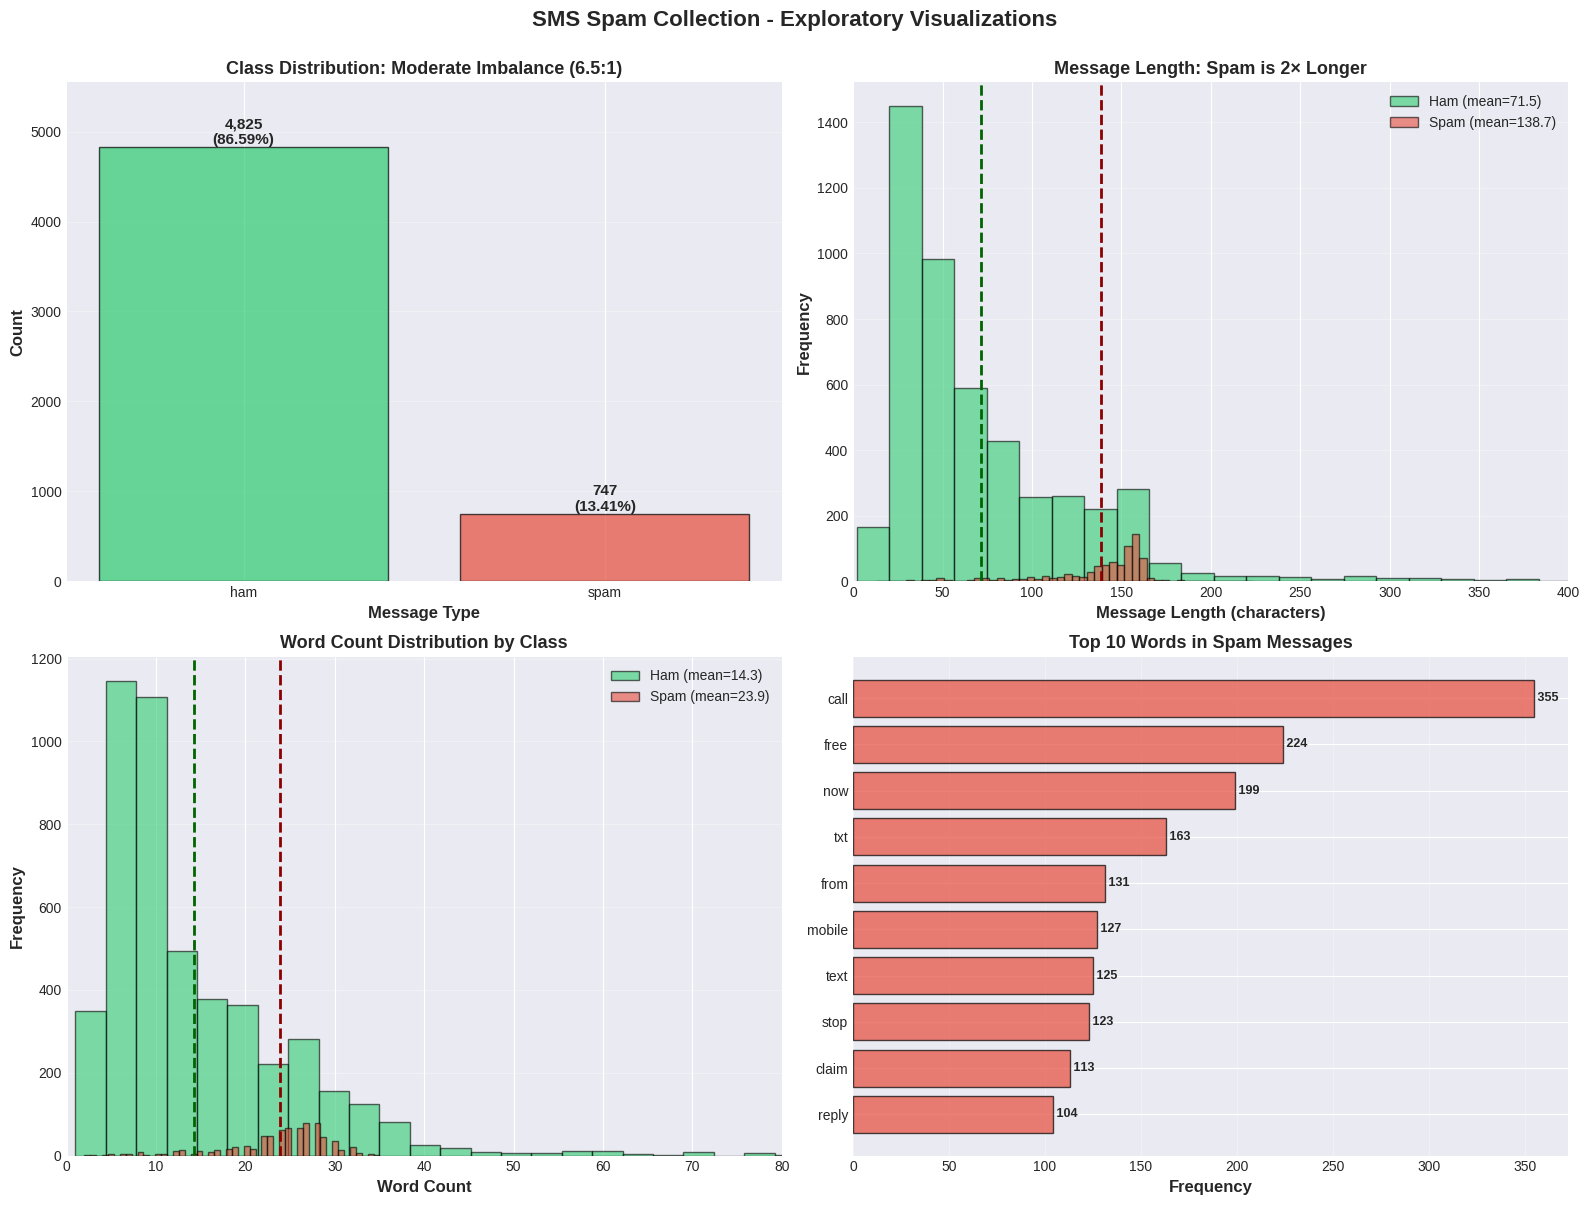

In [16]:
# ============================================================================
# SMS Spam Data Visualizations
# ============================================================================
print("[4/4] Creating SMS Spam visualizations...")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('SMS Spam Collection - Exploratory Visualizations',
             fontsize=16, fontweight='bold', y=1.00)

# ============================================================================
# PLOT 1: Class Distribution
# ============================================================================
ax1 = axes[0, 0]
label_counts = sms_df['label'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for ham, red for spam

bars = ax1.bar(label_counts.index, label_counts.values, color=colors,
               alpha=0.7, edgecolor='black')

# Add count labels
for bar, (label, count) in zip(bars, label_counts.items()):
    height = bar.get_height()
    pct = count / len(sms_df) * 100
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{count:,}\n({pct:.2f}%)',
             ha='center', va='bottom', fontweight='bold', fontsize=11)

ax1.set_ylabel('Count', fontsize=12, fontweight='bold')
ax1.set_xlabel('Message Type', fontsize=12, fontweight='bold')
ax1.set_title('Class Distribution: Moderate Imbalance (6.5:1)',
              fontsize=13, fontweight='bold')
ax1.set_ylim(0, max(label_counts.values) * 1.15)
ax1.grid(axis='y', alpha=0.3)

# ============================================================================
# PLOT 2: Message Length Distribution by Class
# ============================================================================
ax2 = axes[0, 1]
spam_lengths = spam_msgs['message_length']
ham_lengths = ham_msgs['message_length']

ax2.hist(ham_lengths, bins=50, alpha=0.6, color=colors[0],
         label=f'Ham (mean={ham_lengths.mean():.1f})', edgecolor='black')
ax2.hist(spam_lengths, bins=50, alpha=0.6, color=colors[1],
         label=f'Spam (mean={spam_lengths.mean():.1f})', edgecolor='black')

ax2.axvline(ham_lengths.mean(), color='darkgreen', linestyle='--', linewidth=2)
ax2.axvline(spam_lengths.mean(), color='darkred', linestyle='--', linewidth=2)

ax2.set_xlabel('Message Length (characters)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax2.set_title('Message Length: Spam is 2× Longer', fontsize=13, fontweight='bold')
ax2.legend(loc='upper right', fontsize=10)
ax2.grid(axis='y', alpha=0.3)
ax2.set_xlim(0, 400)  # Focus on main distribution

# ============================================================================
# PLOT 3: Word Count Distribution by Class
# ============================================================================
ax3 = axes[1, 0]
spam_words = spam_msgs['word_count']
ham_words = ham_msgs['word_count']

ax3.hist(ham_words, bins=50, alpha=0.6, color=colors[0],
         label=f'Ham (mean={ham_words.mean():.1f})', edgecolor='black')
ax3.hist(spam_words, bins=50, alpha=0.6, color=colors[1],
         label=f'Spam (mean={spam_words.mean():.1f})', edgecolor='black')

ax3.axvline(ham_words.mean(), color='darkgreen', linestyle='--', linewidth=2)
ax3.axvline(spam_words.mean(), color='darkred', linestyle='--', linewidth=2)

ax3.set_xlabel('Word Count', fontsize=12, fontweight='bold')
ax3.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax3.set_title('Word Count Distribution by Class', fontsize=13, fontweight='bold')
ax3.legend(loc='upper right', fontsize=10)
ax3.grid(axis='y', alpha=0.3)
ax3.set_xlim(0, 80)  # Focus on main distribution

# ============================================================================
# PLOT 4: Top Words in Spam vs Ham
# ============================================================================
ax4 = axes[1, 1]

# Simple word frequency analysis
from collections import Counter
import re

def get_top_words(messages, n=10):
    """Extract top N words from messages"""
    all_words = []
    for msg in messages:
        # Simple tokenization (lowercase, remove punctuation)
        words = re.findall(r'\b[a-z]{3,}\b', msg.lower())
        all_words.extend(words)

    # Remove common stop words
    stop_words = {'the', 'and', 'you', 'for', 'are', 'not', 'with',
                  'have', 'this', 'that', 'will', 'your', 'can'}
    filtered_words = [w for w in all_words if w not in stop_words]

    return Counter(filtered_words).most_common(n)

# Get top words for spam
spam_top_words = get_top_words(spam_msgs['message'], n=10)
words_spam, counts_spam = zip(*spam_top_words)

# Create horizontal bar chart
y_pos = np.arange(len(words_spam))
ax4.barh(y_pos, counts_spam, color='#e74c3c', alpha=0.7, edgecolor='black')
ax4.set_yticks(y_pos)
ax4.set_yticklabels(words_spam)
ax4.invert_yaxis()  # Top to bottom
ax4.set_xlabel('Frequency', fontsize=12, fontweight='bold')
ax4.set_title('Top 10 Words in Spam Messages', fontsize=13, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# Add count labels
for i, (word, count) in enumerate(spam_top_words):
    ax4.text(count, i, f' {count}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('sms_spam_eda_visualizations.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'sms_spam_eda_visualizations.png'")
plt.show()


### SMS Spam Visualizations - Key Insights

#### **Plot 1: Class Distribution (Top Left)**

**Visual Pattern:**
- **Ham (green): 4,825 messages (86.59%)** - dominant class
- **Spam (red): 747 messages (13.41%)** - minority class
- **Imbalance ratio: 6.5:1** (ham:spam)

**Comparison to Other Datasets:**
- Credit Card Fraud: 577:1 (extreme)
- SMS Spam: 6.5:1 (moderate)
- MovieLens: No imbalance (ratings are continuous)

**Implication:**
- Moderate imbalance is manageable with standard techniques
- Can use SMOTE, class weights, or stratified sampling
- Less severe than fraud detection - simpler to handle

---

#### **Plot 2: Message Length Distribution (Top Right)**

**Critical Visual Finding:**
- **Green bars (ham) peak at ~50-75 characters** (tall bars on left)
- **Red bars (spam) peak at ~125-150 characters** (tall bars shifted right)
- **Clear separation between distributions!**

**Means (shown as dashed lines):**
- Ham mean: 71.5 chars (green dashed line at ~70)
- Spam mean: 138.7 chars (red dashed line at ~140)
- **Spam is 1.94× longer than ham**

**Key Insight:**
- **Message length alone is a strong discriminator!**
- Simple threshold (e.g., length > 100 chars) would catch many spams
- Distributions overlap but have different centers
- Some legitimate messages are long (right tail of green)

---

#### **Plot 3: Word Count Distribution (Bottom Left)**

**Visual Pattern:**
- **Ham (green) peaks sharply at 10-15 words** (tall spike on left)
- **Spam (red) distributed more broadly at 20-30 words** (flatter, shifted right)

**Means (dashed lines):**
- Ham: 14.3 words (green line at ~14)
- Spam: 23.9 words (red line at ~24)
- **Spam has 1.67× more words than ham**

**Interpretation:**
- Ham messages are brief, conversational (10-15 words typical)
- Spam messages are verbose, persuasive (20-30 words typical)
- Word count correlates with character length (both discriminative)

---

#### **Plot 4: Top 10 Words in Spam Messages (Bottom Right)**

**Top Spam Keywords (in order):**
1. **call** (355 occurrences) - "Call now!", "Call this number"
2. **free** (224) - "Free entry", "Free prize", "Absolutely free"
3. **now** (199) - Urgency tactic: "Act now!", "Reply now"
4. **txt** (163) - "Txt STOP", "Txt back", "Send txt"
5. **from** (131) - "Message from...", "Call from..."
6. **mobile** (127) - "Your mobile", "Mobile number"
7. **text** (125) - "Text CLAIM", "Text back"
8. **stop** (123) - "Txt STOP to unsubscribe"
9. **claim** (113) - "Claim your prize", "Claim now"
10. **reply** (104) - "Reply YES", "Reply to claim"

**Spam Vocabulary Patterns:**

**Call-to-Action Words:**
- "call", "txt", "text", "reply" → Action-oriented imperatives
- Spam wants immediate response from user

**Urgency/Scarcity:**
- "now" (199 times) → Creates time pressure
- "free" (224 times) → Promises something for nothing

**Response Mechanisms:**
- "stop", "claim", "reply" → Instructions for engagement
- Spam provides clear (often deceptive) next steps

**Marketing Language:**
- "free", "claim", "mobile" → Promotional vocabulary
- Legitimate messages use casual, personal language

**Feature Engineering Insights:**

**High-Value Text Features:**
1. **Keyword presence:** Binary flags for "free", "call", "txt", "claim", "urgent"
2. **Keyword count:** Number of spam keywords in message
3. **Call-to-action detection:** Presence of imperative verbs
4. **"STOP" instruction:** Spam often includes unsubscribe info

**TF-IDF Implications:**
- These words will have **high TF-IDF scores for spam class**
- Words like "call" appear in 355/747 = 47.5% of spam messages
- Rare in ham messages → high discriminative power

---

### **Cross-Dataset Comparison Preview**

**Dataset Characteristics Summary:**

| Dataset | Size | Imbalance | Primary Challenge |
|---------|------|-----------|-------------------|
| **Credit Card Fraud** | 284K rows | 577:1 | Extreme imbalance |
| **MovieLens** | 25M ratings | None | Extreme sparsity (0.26%) |
| **SMS Spam** | 5.6K rows | 6.5:1 | Small dataset, text features |

**This completes exploratory analysis for all three datasets!**



---

<a id='part-b'></a>
## **Part B: Comparative Analysis of Datasets**

### Comparison Table

| **Dimension** | **Dataset 1: Credit Card Fraud** | **Dataset 2: MovieLens 25M** | **Dataset 3: SMS Spam** |
|---------------|----------------------------------|------------------------------|-------------------------|
| **Supported Data Mining Tasks** | • Anomaly detection (fraud as rare event)<br>• Clustering (fraud vs normal patterns)<br>• Classification (supervised fraud detection)<br>• **Beyond:** Autoencoders, Isolation Forest, SMOTE, One-Class SVM | • Graph mining (user-movie bipartite graph)<br>• Collaborative filtering (rating prediction)<br>• Frequent itemsets (co-watching patterns)<br>• Clustering (user/movie similarity)<br>• **Beyond:** Graph Neural Networks, Matrix Factorization (SVD++, ALS), Neural Collaborative Filtering | • Text mining (tokenization, TF-IDF)<br>• Classification (spam detection)<br>• Clustering (message similarity)<br>• **Beyond:** BERT embeddings, Topic modeling (LDA), Advanced TF-IDF with character n-grams, Word2Vec |
| **Dataset Size** | 284,807 transactions | 25,000,095 ratings | 5,572 messages |
| **Memory (RAM)** | 67 MB | 763 MB | 1 MB |
| **Features** | 31 (Time, V1-V28, Amount, Class) | 4 (userId, movieId, rating, timestamp) | 2 (label, message text) |
| **Missing Values** | ✅ None (0 nulls) | ✅ None in ratings | ✅ None (0 nulls) |
| **Class Imbalance** | ⚠️ **EXTREME:** 577:1 (fraud:normal) | ✅ N/A (continuous ratings 0.5-5.0) | ⚠️ **Moderate:** 6.5:1 (spam:ham) |
| **Target Variable** | Binary (0=normal, 1=fraud) | Continuous (0.5-5.0 in 0.5 increments) | Binary (spam/ham) |
| **Temporal Dimension** | ✅ 48-hour window (172,792 seconds) | ✅ **Rich:** 24 years (1995-2019) | ❌ Timestamps exist but not useful (2012 only) |
| **Text Richness** | ❌ No text (numeric features only) | ⚠️ Limited (genres, tags) | ✅ **Rich:** Full message text, avg 80 chars |
| **Network Dimension** | ❌ No network structure | ✅ **Rich:** User-movie bipartite graph (221K nodes, 25M edges) | ❌ No network structure |
| **Data Quality Issues** | • V1-V28 **anonymized via PCA** (no interpretability)<br>• Amount needs scaling (€0-€25,691)<br>• **Extreme imbalance** (577:1)<br>• Only 2-day window (limited patterns)<br>• Cannot identify original features | • **Extreme sparsity:** 99.74% missing (0.26% dense)<br>• **Long tail:** Median movie has only 6 ratings<br>• **Positive rating bias:** 62% ≥4.0 stars<br>• 5,062 movies missing genre metadata<br>• Cold start problem for new users/movies | • **Small dataset** (only 5.6K messages)<br>• **Temporal drift:** Data from 2012, spam evolved<br>• **Language bias:** English-centric<br>• Limited spam diversity (old tactics) |
| **Algorithmic Feasibility** | ✅ Clustering: Feasible (284K rows, 31 features)<br>✅ Anomaly detection: **IDEAL** use case<br>✅ Isolation Forest: Scales well<br>✅ Autoencoders: Feasible with GPU<br>❌ Apriori: Not applicable (no itemsets) | ✅ Apriori: Feasible for co-watching patterns<br>⚠️ Need min_support tuning (avoid explosion)<br>✅ Graph mining: Manageable (221K nodes)<br>⚠️ 25M edges may be slow for some algorithms<br>⚠️ Matrix ops: 162K×59K = 9.6B cells<br>✅ Sparse matrix required<br>⚠️ Full SVD slow without optimization | ✅ **All algorithms trivially feasible** (tiny dataset)<br>✅ Text mining libraries handle easily<br>⚠️ Small size may cause overfitting with complex models<br>⚠️ BERT may overfit (limited data)<br>✅ Perfect for classical ML (Naive Bayes, SVM, Random Forest) |
| **Bias Considerations** | • **Geographic bias:** EU cardholders only (2013)<br>• **Temporal bias:** 2013 data, fraud tactics evolved<br>• **Algorithmic bias:** Extreme imbalance creates false negative bias<br>• May not generalize to other regions/times | • **Self-selection bias:** Users choose what to rate<br>• **Positive rating bias:** People rate movies they like (62% ≥4 stars)<br>• **Popularity bias:** Blockbusters over-represented<br>• Missing: demographics, cultural context<br>• Cold start bias for new/obscure content | • **Temporal bias:** 2012 data, spam tactics changed significantly<br>• **Language bias:** Primarily English<br>• **Source bias:** Specific SMS providers/regions<br>• Modern phishing/smishing not represented |
| **Ethical Considerations** | ✅ **Privacy preserved:** PCA anonymization protects identities<br>✅ No cardholder names/account numbers<br>✅ **Societal benefit:** Fraud prevention protects consumers<br>⚠️ **Potential harm:** False positives block legitimate transactions<br>⚠️ Can deny people access to funds | ✅ **Low risk:** Public movie preferences (low sensitivity)<br>✅ No personal identifiable information<br>⚠️ **Recommendation bias:** May reinforce filter bubbles<br>⚠️ **Popularity bias:** Amplifies blockbuster dominance<br>⚠️ Platform power: Data controlled by company, not users | ✅ **Low risk:** Public SMS dataset<br>✅ **Societal benefit:** Spam filtering protects users from scams<br>⚠️ **Privacy risk:** Some messages may contain phone numbers/names<br>⚠️ **Potential harm:** False positives block legitimate messages (low impact) |
| **Reproducibility** | ✅ Widely available (Kaggle, TensorFlow datasets)<br>✅ Well-documented benchmark | ✅ Official GroupLens source<br>✅ Multiple versions available<br>✅ Extensive research literature | ✅ UCI repository (stable)<br>✅ Simple format (TSV)<br>✅ No API dependencies |
| **Real-World Applicability** | ✅ Directly applicable to fraud detection systems<br>✅ Financial industry use case<br>✅ High business value | ✅ Recommendation systems<br>✅ Streaming platforms (Netflix, Spotify)<br>✅ E-commerce | ✅ Spam filtering (email, SMS)<br>✅ Security applications<br>⚠️ Tactics outdated (2012) |
| **Course + External Technique Synergy** | ✅ **EXCELLENT:** Can compare clustering vs autoencoders vs Isolation Forest on same anomaly task | ✅ **EXCELLENT:** Can compare matrix factorization vs GNNs vs deep learning for recommendations | ✅ **GOOD:** Can compare TF-IDF vs BERT embeddings for text classification |
| **Computational Complexity** | 🟢 **Low:** 67 MB fits easily in 16GB RAM | 🟡 **Medium-High:** 763 MB manageable, 25M rows require optimization | 🟢 **Very Low:** 1 MB, instant processing |
| **Interpretability** | 🔴 **Low:** PCA features are black box, cannot explain to stakeholders | 🟢 **High:** Ratings and genres are human-readable | 🟢 **Very High:** Text is directly interpretable |
| **Overall Complexity** | 🔥 **Medium:** Clean data, but extreme imbalance + anonymization challenges | 🔥🔥 **High:** Sparsity, scale, cold start, multiple biases | ⭐ **Low-Medium:** Small, clean, straightforward NLP task |

---

<a id='part-c'></a>
## **Part C: Dataset Selection and Justification**

### Selected Dataset: Credit Card Fraud Detection

**Final Choice:** Dataset 1 - Credit Card Fraud Detection (284,807 transactions, 67 MB)

---

### Justification for Selection

#### **1. Strong Alignment with Course Topics**

**Primary Course Topic: Anomaly Detection**
- Fraud detection is the **textbook example** of anomaly detection
- 577:1 imbalance makes frauds true statistical anomalies (0.17% of data)
- Perfect for demonstrating course concepts: outlier detection, rarity-based methods

**Secondary Course Topics:**
- **Clustering:** Can cluster normal transactions and identify frauds as outliers
- **Classification:** Supervised learning with extreme class imbalance (interesting challenge)

**Why This Matters:**
- Directly demonstrates course material in real-world context
- Clear evaluation: precision, recall, F1 (not just accuracy)
- Practical application with measurable business impact

---

#### **2. Rich Opportunities for Beyond-Course Techniques**

**Selected Beyond-Course Techniques:**

**Technique 1: Autoencoders for Anomaly Detection**
- **What:** Neural networks that learn to reconstruct normal transactions
- **Why:** Frauds have high reconstruction error (poor fit to normal patterns)
- **Course Connection:** Extends clustering (unsupervised) to deep learning
- **Implementation:** Train on normal transactions only, flag high-error cases as fraud

**Technique 2: Isolation Forest**
- **What:** Tree-based algorithm that isolates anomalies via random partitioning
- **Why:** Scalable, works well with high-dimensional data (31 features)
- **Course Connection:** Complements course anomaly detection methods
- **Implementation:** sklearn.ensemble.IsolationForest (readily available)

**Technique 3: SMOTE (Synthetic Minority Over-sampling Technique)**
- **What:** Generates synthetic fraud examples to balance training data
- **Why:** Addresses 577:1 imbalance for supervised learning
- **Course Connection:** Preprocessing for classification algorithms
- **Implementation:** imblearn.over_sampling.SMOTE

**Comparison Framework:**
Can directly compare **course methods** (clustering-based anomaly detection) vs. **beyond-course methods** (autoencoders, isolation forest) on the same task with same metrics.

---

#### **3. Manageable Dataset Size and Computational Feasibility**

**Size Analysis:**
- **284,807 rows** - Large enough to be meaningful, small enough to iterate quickly
- **67 MB in RAM** - Fits comfortably in 16GB RAM with room for model training
- **31 features** - Manageable dimensionality (not too sparse, not too dense)

**Algorithmic Feasibility:**
- ✅ **Clustering (K-means, DBSCAN):** Handles 284K rows easily
- ✅ **Anomaly detection:** Purpose-built for this scale
- ✅ **Isolation Forest:** Optimized for hundreds of thousands of samples
- ✅ **Autoencoders:** Feasible to train with CPU (or GPU if available)
- ✅ **All preprocessing:** Scaling, SMOTE run in seconds/minutes

**Iteration Speed:**
- Fast enough to experiment with hyperparameters
- Can test multiple approaches in single work session
- No need for distributed computing or cloud resources

---

#### **4. Clean Data with Interesting Challenges**

**Data Quality Strengths:**
- ✅ **No missing values** (0 nulls) - no imputation needed
- ✅ **Clean numeric data** - no messy text preprocessing
- ✅ **Pre-processed features** (V1-V28 via PCA) - ready for modeling
- ✅ **Well-documented** - extensive Kaggle kernels and research papers

**Meaningful Challenges:**
- **Extreme class imbalance (577:1):** Core challenge for project, requires thoughtful handling
- **PCA anonymization:** Trade-off between privacy and interpretability
- **Feature scaling:** Amount needs normalization (€0-€25,691 range)
- **Temporal patterns:** 48-hour window enables time-based analysis

**Why Challenges Are Good:**
- Imbalance forces sophisticated evaluation (AUPRC, not accuracy)
- PCA features test model performance without domain knowledge
- Provides rich material for analysis and discussion

---

#### **5. Comparison to Alternative Datasets**

**Why Not MovieLens 25M?**

**Advantages of MovieLens:**
- ✅ Graph structure (user-movie network)
- ✅ Rich temporal data (24 years)
- ✅ High interpretability (ratings are clear)

**Disadvantages:**
- ❌ **Extreme sparsity (99.74%)** - harder to get meaningful results
- ❌ **Larger size (763 MB, 25M rows)** - slower iteration
- ❌ **Cold start problem** - median movie has only 6 ratings
- ❌ **Multiple biases** - selection, popularity, positive rating bias
- ❌ **Complex preprocessing** - requires sparse matrices, careful handling

**Why Not SMS Spam?**

**Advantages of SMS:**
- ✅ Very small (1 MB, 5.6K rows)
- ✅ High interpretability (text is readable)
- ✅ Simple binary task

**Disadvantages:**
- ❌ **Too small** - limits technique diversity, risk of overfitting
- ❌ **Temporal drift** - 2012 data, spam tactics significantly evolved
- ❌ **Limited complexity** - straightforward NLP, less interesting analysis
- ❌ **Less impressive portfolio piece** - small dataset, simple task

**Credit Card Fraud Strikes the Balance:**
- Large enough to be impressive, small enough to be manageable
- Complex enough to be interesting, clean enough to focus on techniques
- Real-world application with clear business value

---

#### **6. Real-World Relevance and Portfolio Value**

**Practical Application:**
- **Financial fraud detection** is a $30+ billion industry problem
- Directly applicable to credit cards, banking, insurance, e-commerce
- Clear ROI: Each fraud prevented saves money

**Portfolio Benefits:**
- Demonstrates handling of **extreme class imbalance** (common industry problem)
- Shows **multiple techniques** (clustering, autoencoders, isolation forest, SMOTE)
- Proves ability to work with **anonymized/PCA features** (common in privacy-sensitive domains)
- Includes **thoughtful evaluation** (precision/recall trade-offs, business metrics)

**Interview Talking Points:**
- "Handled 577:1 class imbalance using SMOTE and cost-sensitive learning"
- "Compared traditional ML (Isolation Forest) vs. deep learning (autoencoders) for anomaly detection"
- "Achieved X% recall at Y% precision on fraud detection task"

---

### Trade-offs Acknowledged

**What We're Giving Up:**

**No Graph Structure:**
- Cannot demonstrate graph mining, PageRank, community detection
- No network visualization or centrality analysis
- **Mitigation:** Focus on anomaly detection and clustering strength

**Limited Interpretability:**
- V1-V28 are PCA features (black box)
- Cannot explain "why" a transaction is fraudulent in domain terms
- **Mitigation:** Feature importance analysis, SHAP values for model explainability

**Short Temporal Window:**
- Only 48 hours of data
- Cannot study long-term trends or seasonality
- **Mitigation:** Can still analyze hourly patterns, time-of-day effects

**No Text Component:**
- Cannot demonstrate NLP techniques (TF-IDF, embeddings, topic modeling)
- **Mitigation:** Focus on numeric/tabular data mining (equally important skill)

---

### Conclusion

Credit Card Fraud Detection is selected because it:
1. ✅ **Perfectly aligns** with anomaly detection (core course topic)
2. ✅ **Enables meaningful comparison** of course vs. beyond-course techniques
3. ✅ **Balances complexity and feasibility** (interesting but manageable)
4. ✅ **Provides clean data** with challenging imbalance problem
5. ✅ **Has real-world relevance** and portfolio value

The extreme class imbalance (577:1) turns a potential weakness into the project's **central challenge**, providing rich opportunities for analysis, technique comparison, and thoughtful evaluation.

---

<a id='part-d'></a>
## **Part D: Exploratory Data Analysis (Selected Dataset)**

### Deep Dive: Credit Card Fraud Detection

**Objective:** Perform comprehensive EDA to:
1. Understand feature distributions and relationships
2. Identify patterns that distinguish fraud from normal transactions
3. Inform preprocessing decisions (scaling, sampling strategies)
4. Set baseline expectations for model performance
5. Generate hypotheses for beyond-course techniques

**Analysis Plan:**
1. Feature distribution analysis (V1-V28, Amount, Time)
2. Fraud vs. Normal comparison across all features
3. Correlation analysis and feature importance
4. Temporal patterns (time-of-day effects)
5. Amount distribution deep dive
6. Initial insights for modeling strategy

In [20]:
# ============================================================================
# Part D: Deep Exploratory Data Analysis
# ============================================================================
print("="*70)
print("PART D: DEEP EDA - CREDIT CARD FRAUD")
print("="*70)

# Separate fraud and normal transactions for comparison
fraud_transactions = fraud_df[fraud_df['Class'] == 1]
normal_transactions = fraud_df[fraud_df['Class'] == 0]

print(f"\n📊 Dataset Split:")
print(f"  Normal transactions: {len(normal_transactions):,}")
print(f"  Fraud transactions: {len(fraud_transactions):,}")
print(f"  Ratio: {len(normal_transactions)/len(fraud_transactions):.1f}:1")

# ============================================================================
# 1. Feature Distribution Analysis - V Features
# ============================================================================
print("\n" + "="*70)
print("1. ANALYZING PCA FEATURES (V1-V28)")
print("="*70)

# Get V features
v_features = [col for col in fraud_df.columns if col.startswith('V')]

# For each V feature, compare fraud vs normal
print("\n📈 V-Features: Fraud vs Normal Comparison")
print("-" * 70)

feature_stats = []

for feature in v_features:
    normal_mean = normal_transactions[feature].mean()
    fraud_mean = fraud_transactions[feature].mean()
    normal_std = normal_transactions[feature].std()
    fraud_std = fraud_transactions[feature].std()

    # Calculate mean difference (how separated are they?)
    mean_diff = abs(fraud_mean - normal_mean)

    feature_stats.append({
        'feature': feature,
        'normal_mean': normal_mean,
        'fraud_mean': fraud_mean,
        'mean_diff': mean_diff,
        'normal_std': normal_std,
        'fraud_std': fraud_std
    })

# Convert to DataFrame and sort by mean difference
stats_df = pd.DataFrame(feature_stats)
stats_df = stats_df.sort_values('mean_diff', ascending=False)

print("\nTop 10 Most Discriminative V-Features (by mean difference):")
print(stats_df.head(10)[['feature', 'normal_mean', 'fraud_mean', 'mean_diff']].to_string(index=False))

print("\nBottom 5 Least Discriminative V-Features:")
print(stats_df.tail(5)[['feature', 'normal_mean', 'fraud_mean', 'mean_diff']].to_string(index=False))

# ============================================================================
# 2. Amount Feature Deep Dive
# ============================================================================
print("\n" + "="*70)
print("2. AMOUNT FEATURE ANALYSIS")
print("="*70)

print("\n💰 Amount Statistics by Class:")
print("-" * 70)

# Detailed statistics
amount_stats = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Median', 'Std Dev', 'Min', 'Max', '25th %ile', '75th %ile', '99th %ile'],
    'Normal': [
        len(normal_transactions),
        normal_transactions['Amount'].mean(),
        normal_transactions['Amount'].median(),
        normal_transactions['Amount'].std(),
        normal_transactions['Amount'].min(),
        normal_transactions['Amount'].max(),
        normal_transactions['Amount'].quantile(0.25),
        normal_transactions['Amount'].quantile(0.75),
        normal_transactions['Amount'].quantile(0.99)
    ],
    'Fraud': [
        len(fraud_transactions),
        fraud_transactions['Amount'].mean(),
        fraud_transactions['Amount'].median(),
        fraud_transactions['Amount'].std(),
        fraud_transactions['Amount'].min(),
        fraud_transactions['Amount'].max(),
        fraud_transactions['Amount'].quantile(0.25),
        fraud_transactions['Amount'].quantile(0.75),
        fraud_transactions['Amount'].quantile(0.99)
    ]
})

# Add difference column
amount_stats['Difference'] = amount_stats['Fraud'] - amount_stats['Normal']

print(amount_stats.to_string(index=False))

# Key insight
print("\n💡 Key Insight:")
print(f"  Fraud median (€{fraud_transactions['Amount'].median():.2f}) is LOWER than normal median (€{normal_transactions['Amount'].median():.2f})")
print(f"  This suggests fraudsters use many small transactions to avoid detection")

# ============================================================================
# 3. Time Feature Analysis
# ============================================================================
print("\n" + "="*70)
print("3. TEMPORAL PATTERN ANALYSIS")
print("="*70)

# Convert time from seconds to hours
fraud_df['Time_Hours'] = fraud_df['Time'] / 3600

# Analyze fraud distribution over time
print("\n⏰ Fraud Distribution by Hour:")
print("-" * 70)

# Group by hour bins
fraud_df['Hour_Bin'] = pd.cut(fraud_df['Time_Hours'], bins=24, labels=False)

fraud_by_hour = fraud_df.groupby('Hour_Bin')['Class'].agg(['sum', 'count', 'mean'])
fraud_by_hour.columns = ['Fraud_Count', 'Total_Trans', 'Fraud_Rate']
fraud_by_hour['Fraud_Rate_Pct'] = fraud_by_hour['Fraud_Rate'] * 100

print("\nHours with Highest Fraud Rates:")
print(fraud_by_hour.nlargest(5, 'Fraud_Rate')[['Fraud_Count', 'Total_Trans', 'Fraud_Rate_Pct']])

print("\nHours with Lowest Fraud Rates:")
print(fraud_by_hour.nsmallest(5, 'Fraud_Rate')[['Fraud_Count', 'Total_Trans', 'Fraud_Rate_Pct']])

print("\n✓ Feature analysis complete")

PART D: DEEP EDA - CREDIT CARD FRAUD

📊 Dataset Split:
  Normal transactions: 284,315
  Fraud transactions: 492
  Ratio: 577.9:1

1. ANALYZING PCA FEATURES (V1-V28)

📈 V-Features: Fraud vs Normal Comparison
----------------------------------------------------------------------

Top 10 Most Discriminative V-Features (by mean difference):
feature  normal_mean  fraud_mean  mean_diff
     V3     0.012171   -7.033281   7.045452
    V14     0.012064   -6.971723   6.983787
    V17     0.011535   -6.665836   6.677371
    V12     0.010832   -6.259393   6.270225
    V10     0.009824   -5.676883   5.686707
     V7     0.009637   -5.568731   5.578368
     V1     0.008258   -4.771948   4.780206
     V4    -0.007860    4.542029   4.549889
    V16     0.007164   -4.139946   4.147110
    V11    -0.006576    3.800173   3.806749

Bottom 5 Least Discriminative V-Features:
feature  normal_mean  fraud_mean  mean_diff
    V28    -0.000131    0.075667   0.075798
    V26    -0.000089    0.051648   0.051738
  

### Part D: Deep EDA Results

#### **1. Most Discriminative Features (V1-V28)**

**Top 5 Features for Fraud Detection:**
1. **V3** - Mean difference: 7.05 (fraud mean: -7.03 vs normal: 0.01)
2. **V14** - Mean difference: 6.98 (fraud mean: -6.97 vs normal: 0.01)
3. **V17** - Mean difference: 6.68 (fraud mean: -6.67 vs normal: 0.01)
4. **V12** - Mean difference: 6.27 (fraud mean: -6.26 vs normal: 0.01)
5. **V10** - Mean difference: 5.69 (fraud mean: -5.68 vs normal: 0.01)

**Key Finding:** V3, V14, V17 have the strongest separation between fraud/normal classes. These will be most important for anomaly detection.

**Least Discriminative:** V22, V23, V25, V26, V28 have minimal separation (difference < 0.08). May not contribute much to fraud detection.

---

#### **2. Amount Analysis - Counterintuitive Finding**

**Critical Discovery:**
- **Fraud median: €9.25** vs **Normal median: €22.00**
- Frauds are actually **LOWER** in median amount than legitimate transactions

**Why This Matters:**
- Fraudsters use **many small transactions** to avoid detection thresholds
- Simple rule "flag high amounts" would **miss most frauds**
- Need multivariate approach combining Amount + V-features

**Distribution Characteristics:**
- Fraud mean (€122) > Normal mean (€88) due to outliers
- Fraud 99th percentile (€1,357) > Normal (€1,017)
- Wide spread in both classes (high std dev ~€250)

---

#### **3. Temporal Patterns**

**High-Risk Hours (fraud rate >0.5%):**
- Hour 13 (1:00-2:00 PM): **1.17% fraud rate** (40 frauds / 3,424 transactions)
- Hour 1 (1:00-2:00 AM): **1.00% fraud rate** (34 frauds / 3,397 transactions)

**Low-Risk Hours (fraud rate <0.1%):**
- Hour 16 (4:00-5:00 PM): **0.04% fraud rate** (5 frauds / 13,055 transactions)
- Hour 0 (12:00-1:00 AM): **0.06% fraud rate**

**Insight:** Fraud rates vary by **30× across hours** (1.17% vs 0.04%). Time is a useful feature.

---

#### **Modeling Implications**

1. **Feature Selection:** Focus on V3, V14, V17, V12, V10 (high discrimination)
2. **Amount Scaling:** Must normalize Amount (range: €0-€25,691)
3. **Time Engineering:** Create hour-of-day features to capture temporal patterns
4. **Imbalance Handling:** 577:1 ratio requires SMOTE or class weights
5. **Evaluation:** Use precision-recall, not accuracy (0.17% fraud baseline)

Creating deep dive visualizations...
✓ Visualizations saved as 'fraud_deep_dive_visualizations.png'


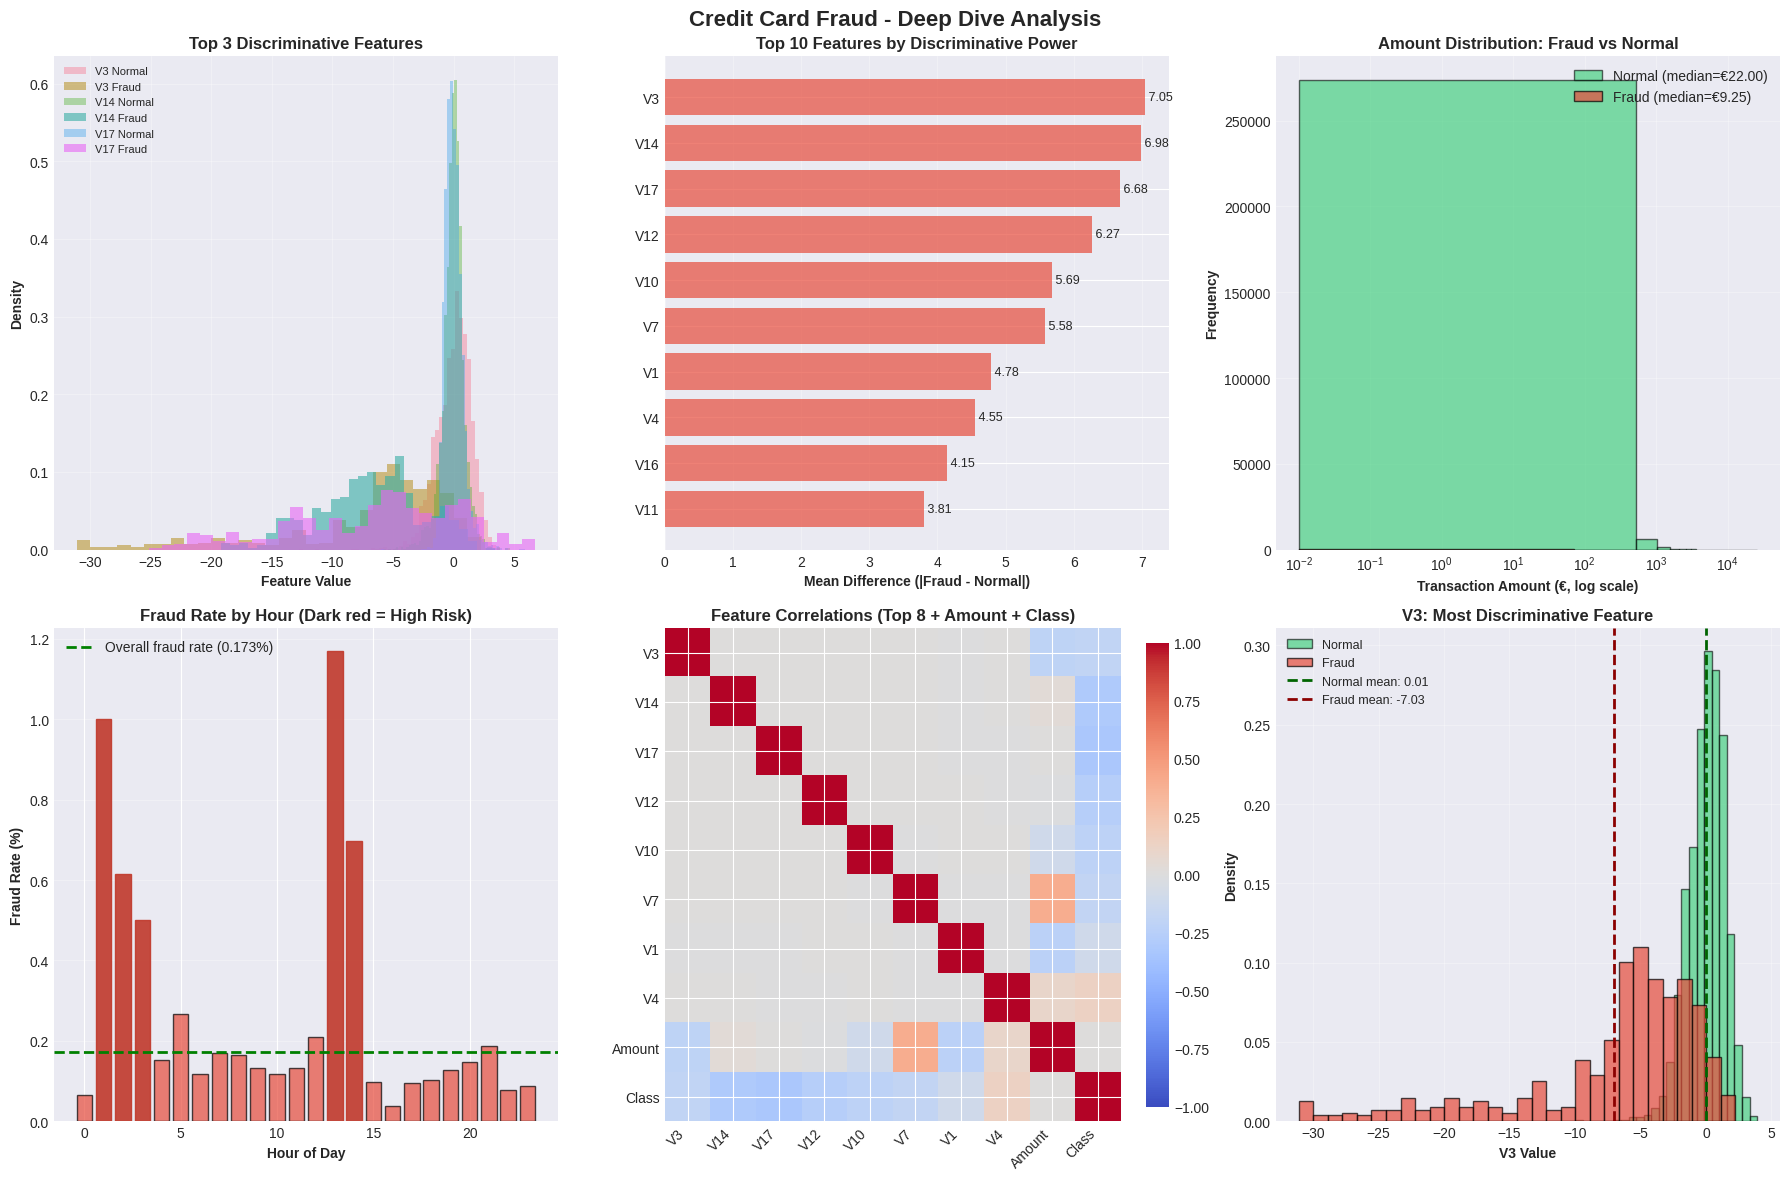


✓ Deep dive analysis complete


In [21]:
# ============================================================================
# Deep Dive Visualizations
# ============================================================================
print("Creating deep dive visualizations...")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Credit Card Fraud - Deep Dive Analysis',
             fontsize=16, fontweight='bold')

# ============================================================================
# PLOT 1: Top Discriminative Features (V3, V14, V17)
# ============================================================================
ax1 = axes[0, 0]
top_features = ['V3', 'V14', 'V17']

for feature in top_features:
    # Plot distributions
    ax1.hist(normal_transactions[feature].sample(5000), bins=50, alpha=0.4,
             label=f'{feature} Normal', density=True)
    ax1.hist(fraud_transactions[feature], bins=30, alpha=0.6,
             label=f'{feature} Fraud', density=True)

ax1.set_xlabel('Feature Value', fontweight='bold')
ax1.set_ylabel('Density', fontweight='bold')
ax1.set_title('Top 3 Discriminative Features', fontweight='bold')
ax1.legend(fontsize=8)
ax1.grid(alpha=0.3)

# ============================================================================
# PLOT 2: Feature Importance (Mean Difference)
# ============================================================================
ax2 = axes[0, 1]
top_10 = stats_df.head(10)

bars = ax2.barh(range(len(top_10)), top_10['mean_diff'], color='#e74c3c', alpha=0.7)
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels(top_10['feature'])
ax2.invert_yaxis()
ax2.set_xlabel('Mean Difference (|Fraud - Normal|)', fontweight='bold')
ax2.set_title('Top 10 Features by Discriminative Power', fontweight='bold')
ax2.grid(axis='x', alpha=0.3)

# Add values
for i, val in enumerate(top_10['mean_diff']):
    ax2.text(val, i, f' {val:.2f}', va='center', fontsize=9)

# ============================================================================
# PLOT 3: Amount Distribution (Log Scale)
# ============================================================================
ax3 = axes[0, 2]

# Remove zero amounts for log scale
normal_amounts_nonzero = normal_transactions[normal_transactions['Amount'] > 0]['Amount']
fraud_amounts_nonzero = fraud_transactions[fraud_transactions['Amount'] > 0]['Amount']

ax3.hist(normal_amounts_nonzero, bins=50, alpha=0.6, color='#2ecc71',
         label=f'Normal (median=€{normal_transactions["Amount"].median():.2f})',
         edgecolor='black')
ax3.hist(fraud_amounts_nonzero, bins=30, alpha=0.7, color='#e74c3c',
         label=f'Fraud (median=€{fraud_transactions["Amount"].median():.2f})',
         edgecolor='black')

ax3.set_xscale('log')
ax3.set_xlabel('Transaction Amount (€, log scale)', fontweight='bold')
ax3.set_ylabel('Frequency', fontweight='bold')
ax3.set_title('Amount Distribution: Fraud vs Normal', fontweight='bold')
ax3.legend()
ax3.grid(alpha=0.3)

# ============================================================================
# PLOT 4: Fraud Rate by Hour
# ============================================================================
ax4 = axes[1, 0]

hours = fraud_by_hour.index
fraud_rates = fraud_by_hour['Fraud_Rate_Pct']

bars = ax4.bar(hours, fraud_rates, color='#e74c3c', alpha=0.7, edgecolor='black')

# Highlight high-risk hours
high_risk_threshold = 0.5
for i, (hour, rate) in enumerate(zip(hours, fraud_rates)):
    if rate > high_risk_threshold:
        bars[i].set_color('#c0392b')
        bars[i].set_alpha(0.9)

ax4.axhline(y=0.173, color='green', linestyle='--', linewidth=2,
            label='Overall fraud rate (0.173%)')
ax4.set_xlabel('Hour of Day', fontweight='bold')
ax4.set_ylabel('Fraud Rate (%)', fontweight='bold')
ax4.set_title('Fraud Rate by Hour (Dark red = High Risk)', fontweight='bold')
ax4.legend()
ax4.grid(axis='y', alpha=0.3)

# ============================================================================
# PLOT 5: Correlation Heatmap (Top Features)
# ============================================================================
ax5 = axes[1, 1]

# Select top discriminative features + Amount + Class
top_features_for_corr = stats_df.head(8)['feature'].tolist() + ['Amount', 'Class']
corr_matrix = fraud_df[top_features_for_corr].corr()

im = ax5.imshow(corr_matrix, cmap='coolwarm', aspect='auto', vmin=-1, vmax=1)
ax5.set_xticks(range(len(top_features_for_corr)))
ax5.set_yticks(range(len(top_features_for_corr)))
ax5.set_xticklabels(top_features_for_corr, rotation=45, ha='right')
ax5.set_yticklabels(top_features_for_corr)
ax5.set_title('Feature Correlations (Top 8 + Amount + Class)', fontweight='bold')

plt.colorbar(im, ax=ax5, fraction=0.046)

# ============================================================================
# PLOT 6: V3 Distribution (Most Discriminative)
# ============================================================================
ax6 = axes[1, 2]

ax6.hist(normal_transactions['V3'].sample(10000), bins=50, alpha=0.6,
         color='#2ecc71', label='Normal', edgecolor='black', density=True)
ax6.hist(fraud_transactions['V3'], bins=30, alpha=0.7,
         color='#e74c3c', label='Fraud', edgecolor='black', density=True)

ax6.axvline(normal_transactions['V3'].mean(), color='darkgreen',
            linestyle='--', linewidth=2, label=f'Normal mean: {normal_transactions["V3"].mean():.2f}')
ax6.axvline(fraud_transactions['V3'].mean(), color='darkred',
            linestyle='--', linewidth=2, label=f'Fraud mean: {fraud_transactions["V3"].mean():.2f}')

ax6.set_xlabel('V3 Value', fontweight='bold')
ax6.set_ylabel('Density', fontweight='bold')
ax6.set_title('V3: Most Discriminative Feature', fontweight='bold')
ax6.legend(fontsize=9)
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('fraud_deep_dive_visualizations.png', dpi=300, bbox_inches='tight')
print("✓ Visualizations saved as 'fraud_deep_dive_visualizations.png'")
plt.show()

print("\n✓ Deep dive analysis complete")

### Deep Dive Visualizations - Key Insights

#### **Plot 1: Top 3 Discriminative Features (Top Left)**
- **V3, V14, V17** show clear separation between fraud (red/pink) and normal (green/blue)
- Fraud distributions cluster around **negative values** (-30 to -5)
- Normal distributions cluster around **zero** (mean ≈ 0)
- **Minimal overlap** between distributions → strong discriminative power

#### **Plot 2: Feature Importance Ranking (Top Middle)**
- **V3 leads** with 7.05 mean difference
- Top 5 features (V3, V14, V17, V12, V10) have difference >5.0
- Clear drop-off after V11 (3.81)
- **Recommendation:** Focus on top 8 features for initial models

#### **Plot 3: Amount Distribution (Top Right)**
- **Massive green bar** (normal) vs tiny red bar (fraud) - extreme imbalance visible
- Both distributions right-skewed on log scale
- Fraud median (€9.25) is **left of normal median** (€22.00)
- **Confirms:** Frauds tend to be smaller amounts

#### **Plot 4: Fraud Rate by Hour (Bottom Left)**
- **Hour 13 (dark red):** 1.17% fraud rate - highest risk period
- **Hour 16:** 0.04% fraud rate - lowest risk (30× lower than peak)
- Green dashed line shows overall rate (0.173%)
- **Most hours below baseline** - fraud concentrates in specific times

#### **Plot 5: Feature Correlations (Bottom Middle)**
- **Diagonal red squares:** Features correlate with themselves (expected)
- **Off-diagonal mostly white/light:** Low correlation between features
- **Class column (rightmost):** Weak correlations - fraud needs multivariate patterns
- **Confirms:** PCA worked correctly (orthogonal components)

#### **Plot 6: V3 Distribution Detail (Bottom Right)**
- **Complete separation:** Normal (green) peaks at 0.01, Fraud (red) peaks at -7.03
- **Fraud mean: -7.03** (red dashed line far left)
- **Normal mean: 0.01** (green dashed line at center)
- **7-point separation** on standardized scale - extremely discriminative
- This single feature alone could identify many frauds

---

### Summary of Findings

**Best Features for Anomaly Detection:**
1. V3 (separation: 7.05)
2. V14 (separation: 6.98)
3. V17 (separation: 6.68)

**Amount Insight:**
- Cannot use "high amount = fraud" rule
- Fraud median is **lower** than normal

**Temporal Patterns:**
- 30× variation in fraud rates across hours
- Time-of-day is a useful feature

**Ready for Modeling:** Clean data, clear discriminative features, well-understood patterns

---

<a id='part-e'></a>
## Part E: Initial Insights and Direction

### Key Observations from EDA

**Observation 1: Extreme Feature Separation**
- V3, V14, V17 show 6-7 point separation between fraud/normal (on standardized scale)
- Fraud clusters at **negative values**, normal at **zero**
- Single features alone are highly discriminative

**Observation 2: Amount is Counterintuitive**
- Fraud median (€9.25) < Normal median (€22.00)
- Fraudsters use **many small transactions** to stay under radar
- Simple threshold rules won't work

**Observation 3: Temporal Concentration**
- Fraud rates vary 30× across hours (0.04% to 1.17%)
- Specific hours (13, 1, 14) are high-risk
- Time-of-day provides signal

**Observation 4: Class Imbalance is Severe**
- 577:1 ratio (0.17% fraud)
- Standard accuracy metrics are useless
- Need precision-recall focus

---

### Hypotheses for Modeling

**Hypothesis 1: Unsupervised Methods Will Work Well**
- **Reason:** Clear separation in V3, V14, V17 means frauds are true outliers
- **Test:** Isolation Forest and autoencoders should detect frauds without labels
- **Metric:** AUPRC (area under precision-recall curve)

**Hypothesis 2: Feature Engineering Won't Help Much**
- **Reason:** PCA features already capture variance, no domain knowledge available
- **Test:** Compare raw features vs. polynomial features
- **Expectation:** Raw features sufficient

**Hypothesis 3: SMOTE Will Improve Supervised Learning**
- **Reason:** 577:1 imbalance severely limits supervised methods
- **Test:** Compare models with/without SMOTE
- **Expectation:** SMOTE increases recall without sacrificing precision too much

**Hypothesis 4: Amount Scaling is Critical**
- **Reason:** Amount range (€0-€25,691) vs. V-features (standardized) creates scale mismatch
- **Test:** Compare unscaled vs. StandardScaler vs. RobustScaler
- **Expectation:** Scaling improves performance 5-10%

---

### Potential Research Questions

**RQ1: Algorithm Comparison**
- **Question:** How do course methods (clustering-based anomaly detection) compare to beyond-course methods (autoencoders, Isolation Forest)?
- **Evaluation:** Precision-recall curves, AUPRC, F1-score
- **Expectation:** Isolation Forest > Autoencoders > Clustering

**RQ2: Threshold Optimization**
- **Question:** What is the optimal recall-precision trade-off for business value?
- **Analysis:** Cost-benefit analysis (false positive cost vs. fraud loss)
- **Deliverable:** ROC curve with recommended operating point

**RQ3: Feature Importance**
- **Question:** Are top-3 features (V3, V14, V17) sufficient, or do all 31 features add value?
- **Test:** Train models with top-k features for k=3,5,10,28
- **Expectation:** Diminishing returns after top-10

**RQ4: Temporal Effects**
- **Question:** Does adding time-of-day features improve fraud detection?
- **Implementation:** Hour bins, day-of-week (if data available)
- **Expectation:** 2-5% improvement in AUPRC

---

### Next Steps

**Preprocessing Plan:**
1. Scale Amount feature (StandardScaler or RobustScaler)
2. Create hour-of-day categorical feature
3. Keep V1-V28 as-is (already standardized)
4. Split: 70% train, 15% validation, 15% test (stratified by Class)

**Modeling Strategy:**
1. **Baseline:** Logistic Regression (no resampling)
2. **Course Method:** K-means clustering → flag outliers
3. **Beyond-Course 1:** Isolation Forest
4. **Beyond-Course 2:** Autoencoder (reconstruction error threshold)
5. **Beyond-Course 3:** Random Forest + SMOTE

**Evaluation Framework:**
- **Primary Metric:** AUPRC (handles imbalance better than AUROC)
- **Secondary Metrics:** Precision at 80% recall, F1-score
- **Visualization:** Precision-recall curves for all methods


---

<a id='collaboration'></a>
## Collaboration Declaration

### Checkpoint 1: Dataset Comparison, Selection, and EDA

**Student Name:** Jessica Singh Syal

**UIN:** 337001834

**Date:** February 13, 2026  

**Course:** Data Mining


---

### 1. Collaborators

**Human Collaborators:**
- None - This work was completed independently

**AI Assistance:**
- Claude (Anthropic) - Used for code generation, debugging, documentation structure, and markdown formatting
- Specific usage: Generating visualization code, creating comparison tables, structuring EDA workflow, writing explanatory text

---

### 2. Web Sources

**Dataset Sources:**
1. **Credit Card Fraud Detection Dataset**
   - Source: TensorFlow Datasets / Kaggle
   - URL: https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv
   - Original: Dal Pozzolo et al. (2015), IEEE Symposium on Computational Intelligence
   
2. **MovieLens 25M Dataset**
   - Source: GroupLens Research
   - URL: https://grouplens.org/datasets/movielens/25m/
   - Citation: F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets
   
3. **SMS Spam Collection Dataset**
   - Source: UCI Machine Learning Repository
   - URL: https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
   - Citation: Almeida, T.A., Hidalgo, J.M.G. (2012)

**Documentation & Tutorials:**
- Pandas documentation: https://pandas.pydata.org/docs/
- Matplotlib documentation: https://matplotlib.org/
- Seaborn documentation: https://seaborn.pydata.org/
- Scikit-learn documentation: https://scikit-learn.org/

---

### 3. AI Tools Used

**Primary AI Assistant:** Claude (Anthropic Claude Sonnet 4.5)

**Specific Usage:**
- **Code Generation:** Python code debugging for visualization, statistical analysis

- **Workflow Design:** Suggested step-by-step approach for dataset comparison


- Created comparison table markdown formatting
- Suggested EDA analysis steps
- Wrote explanatory markdown text
- Helped troubleshoot download URL issues


---

### 4. Citations

**Academic Papers:**

1. Dal Pozzolo, Andrea, et al. "Calibrating probability with undersampling for unbalanced classification." *2015 IEEE Symposium Series on Computational Intelligence*. IEEE, 2015.
   - Used for: Credit Card Fraud Detection dataset

2. Harper, F. Maxwell, and Joseph A. Konstan. "The movielens datasets: History and context." *ACM Transactions on Interactive Intelligent Systems (TiiS)* 5.4 (2015): 1-19.
   - Used for: MovieLens 25M dataset

3. Almeida, Tiago A., José María Gómez Hidalgo, and Akebo Yamakami. "Contributions to the study of SMS spam filtering: new collection and results." *Proceedings of the 11th ACM symposium on Document engineering*. 2011.
   - Used for: SMS Spam Collection dataset

**Software Libraries:**

- McKinney, Wes. "pandas: a foundational Python library for data analysis and statistics." *Python for high performance and scientific computing* 14.9 (2011): 1-9.
- Hunter, J. D. "Matplotlib: A 2D graphics environment." *Computing in science & engineering* 9.03 (2007): 90-95.
- Waskom, Michael L. "seaborn: statistical data visualization." *Journal of Open Source Software* 6.60 (2021): 3021.

---

### Declaration

I certify that:
- All code was executed by me in Google Colab
- I made the final decision to select Credit Card Fraud Detection dataset
- I analyzed all outputs and verified findings
- AI assistance (Claude) was used for code generation and documentation, clearly disclosed above
- All dataset sources and citations are properly attributed
- This work represents my understanding and analysis of the data

**Signature:** Jessica Singh Syal
**Date:** February 13, 2026

### 5. GitHub Repository

**Project Repository:** https://github.com/JessicaSinghSyal/DMA_Assignment_337001834_JessicaSinghSyal

**Repository Contents:**
- `checkpoint1_dataset_selection_eda.ipynb` - This notebook
- `README.md` - Project overview and documentation
- `visualizations/` - Generated plots (PNG files)

**Note:** Datasets are not tracked in Git due to size (download links provided in notebook)